In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
# Race data
df = pd.read_csv('./../data/cleaned/race_data.csv')
df

,Division,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,when,location,track,championship
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,...,Alex,0.16,4.22,Hector,0,4.13,2023-04-22 10:11:57,Heroltice,4,cz
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,...,Bella,0.23,4.52,Bree,0,4.28,2023-04-22 10:11:57,Heroltice,5,cz
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,0.02,4.25,Dixie,...,Alex,0.34,4.25,Hector,0,4.18,2023-04-22 10:13:25,Heroltice,4,cz
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,...,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,5,cz
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,...,Alex,0.12,4.27,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,4,cz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,5.0,Akela All in,JokerZ Sid,17.09,W,22.5,Reed,0.09,3.92,Mono,...,Ízisz,0,4.43,Oszkár,0.59,3.99,2023-07-30 17:17:21,Tapioszentmarton,5,efc
8195,5.0,JokerZ Sid,Akela All in,16.99,L,22.5,Twister,0.10,4.26,Pötyi,...,Armando,0,4.21,Zara,0,4.11,2023-07-30 17:18:14,Tapioszentmarton,4,efc
8196,5.0,Akela All in,JokerZ Sid,16.61,W,22.5,Reed,0.01,3.87,Mono,...,Ízisz,Ok,4.53,Oszkár,0.18,3.98,2023-07-30 17:18:14,Tapioszentmarton,5,efc
8197,5.0,JokerZ Sid,Akela All in,17.05,L,22.5,Twister,-0.03,4.22,Pötyi,...,Armando,0,4.3,Zara,0,4.16,2023-07-30 17:19:09,Tapioszentmarton,4,efc


In [4]:
# Dog's basic data
df_alap = pd.read_csv('./../data/cleaned/dogs_data.csv')
df_alap.set_index('name', inplace=True)

# Check the effect of the track color

In [5]:
# Track colors are decoded by boolean type color codes (4 and 5), let's convert these to values 0 and 1, for the easier interpretation:
# 0 -> blue
# 1 -> red

df['track'].replace(4,0,inplace=True)
df['track'].replace(5,1,inplace=True)
df

,Division,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,when,location,track,championship
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,...,Alex,0.16,4.22,Hector,0,4.13,2023-04-22 10:11:57,Heroltice,0,cz
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,...,Bella,0.23,4.52,Bree,0,4.28,2023-04-22 10:11:57,Heroltice,1,cz
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,0.02,4.25,Dixie,...,Alex,0.34,4.25,Hector,0,4.18,2023-04-22 10:13:25,Heroltice,0,cz
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,...,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,1,cz
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,...,Alex,0.12,4.27,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,0,cz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,5.0,Akela All in,JokerZ Sid,17.09,W,22.5,Reed,0.09,3.92,Mono,...,Ízisz,0,4.43,Oszkár,0.59,3.99,2023-07-30 17:17:21,Tapioszentmarton,1,efc
8195,5.0,JokerZ Sid,Akela All in,16.99,L,22.5,Twister,0.10,4.26,Pötyi,...,Armando,0,4.21,Zara,0,4.11,2023-07-30 17:18:14,Tapioszentmarton,0,efc
8196,5.0,Akela All in,JokerZ Sid,16.61,W,22.5,Reed,0.01,3.87,Mono,...,Ízisz,Ok,4.53,Oszkár,0.18,3.98,2023-07-30 17:18:14,Tapioszentmarton,1,efc
8197,5.0,JokerZ Sid,Akela All in,17.05,L,22.5,Twister,-0.03,4.22,Pötyi,...,Armando,0,4.3,Zara,0,4.16,2023-07-30 17:19:09,Tapioszentmarton,0,efc


In [6]:
# Create a new df with only the WRFT team's race data
df['who'] = df['who'].str.lower()
df['with who'] = df['with who'].str.lower()
df_onlywild = df[df['who'].str.contains("wildrunner")]
df_onlywild.sort_values('when',inplace=True)
df_onlywild['when'] = df_onlywild['when'].astype('datetime64[ns]')

df_onlywild['track'].value_counts()

track
1    552
0    545
Name: count, dtype: int64

In [7]:

# Sort time and change time data into a new dataframe (for the easier analysis for race times), then concat the dogs's basic data

dog_perf = pd.concat([df_onlywild[['name','start','1.dog','track','location','when']], 
                      df_onlywild[['name.1','chng','2.dog','track','location','when']].rename(columns={'name.1': 'name','chng': 'start','2.dog':'1.dog'}), 
                      df_onlywild[['name.2','chng.1','3.dog','track','location','when']].rename(columns={'name.2': 'name','chng.1': 'start','3.dog':'1.dog'}), 
                      df_onlywild[['name.3','chng.2','4.dog','track','location','when']].rename(columns={'name.3': 'name','chng.2': 'start','4.dog':'1.dog'})], ignore_index=True)
dog_perf = dog_perf.join(df_alap, on='name')
dog_perf.drop(['host','birth_date','chip_number','ulna_length'],axis=1,inplace=True)
dog_perf.rename(columns={'start':'chng','1.dog':'time'},inplace=True)
dog_perf.head()

,name,chng,time,track,location,when,breed,sex,castrated,hurdle_height,age
0,Sunny,-0.24,4.21,0,Heroltice,2023-04-22 10:11:57,belgian shepherd - malinois,female,neutral,32.5,4
1,Brooke,-0.11,4.08,1,Heroltice,2023-04-22 10:11:57,border,male,sexual,30.0,3
2,Sunny,0.02,4.25,0,Heroltice,2023-04-22 10:13:25,belgian shepherd - malinois,female,neutral,32.5,4
3,Brooke,-0.63,4.25,1,Heroltice,2023-04-22 10:13:25,border,male,sexual,30.0,3
4,Sunny,-0.06,4.21,0,Heroltice,2023-04-22 10:15:06,belgian shepherd - malinois,female,neutral,32.5,4


### Team level analysis

track
1    552
0    545
Name: count, dtype: int64
0.6164745536580005


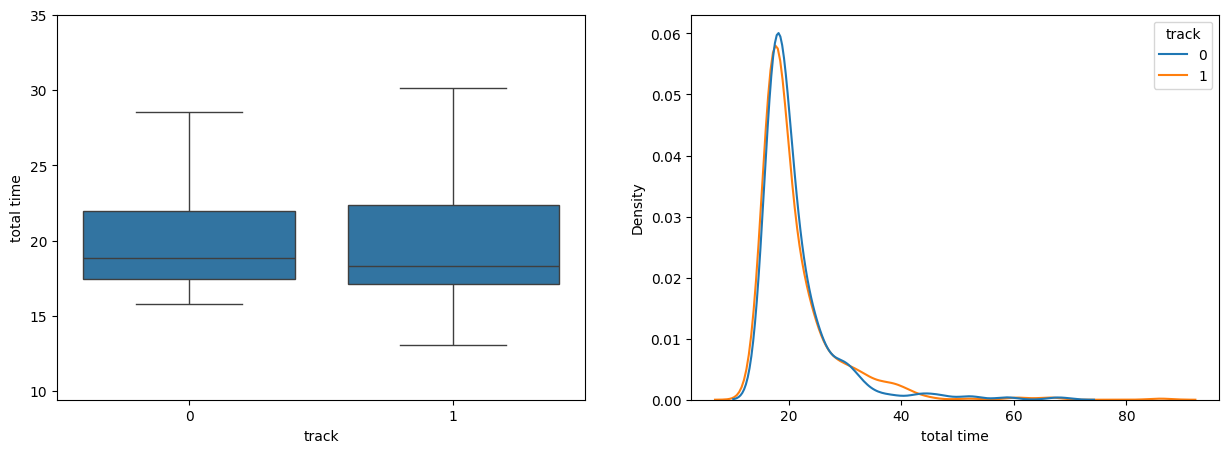

In [8]:
# Total time runtime by track color
print(df_onlywild['track'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=df_onlywild, x='track', y='total time', fliersize=False)
plt.ylim(top=35)
plt.subplot(122)
sns.kdeplot(data=df_onlywild, x='total time', hue='track')

# Distribution of data by track color
print(df_onlywild[df_onlywild['track']==1]['total time'].std() - df_onlywild[df_onlywild['track']==0]['total time'].std())

### Individual level analysis

In [11]:
# Convert change and time columns into numeric type
dog_perf_num = dog_perf[['chng','time','breed','track','sex','castrated','hurdle_height','age','location']].copy()
numeric_columns = ['chng','time']
dog_perf_num[numeric_columns] = dog_perf_num[numeric_columns].apply(pd.to_numeric, errors='coerce')

(1.9235208532319659, 10.0)

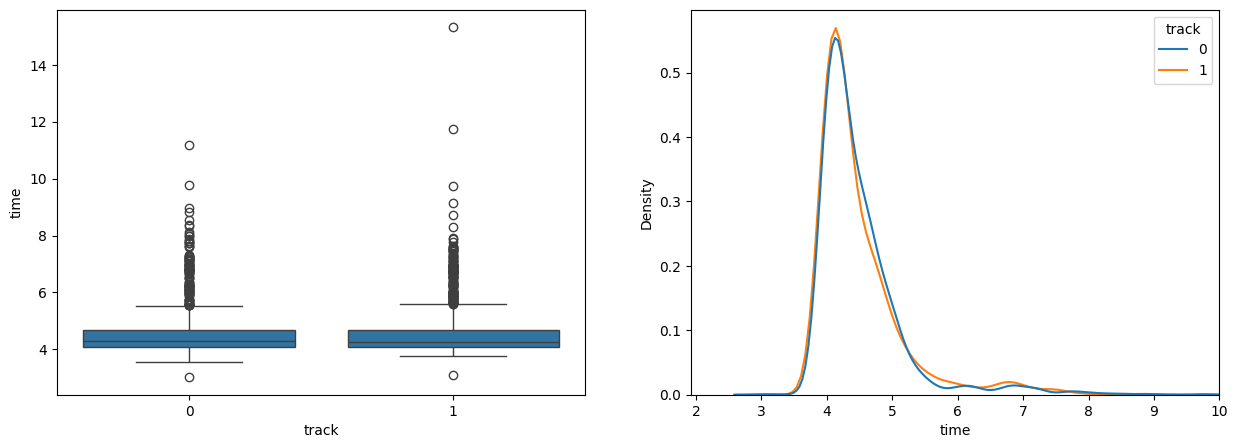

In [12]:
# Individual runtimes and it's distribution as the function of track color
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=dog_perf_num, x='track', y='time')
plt.subplot(122)
sns.kdeplot(data=dog_perf_num, x='time', hue='track')
plt.xlim(right=10)

In [13]:
# Standard deviation of individul run times by track color
print(dog_perf_num[dog_perf_num['track']==0]['time'].std())
print(dog_perf_num[dog_perf_num['track']==1]['time'].std())

0.6742729248459047
0.7394114843831051


(-4.896520708932348, 10.0)

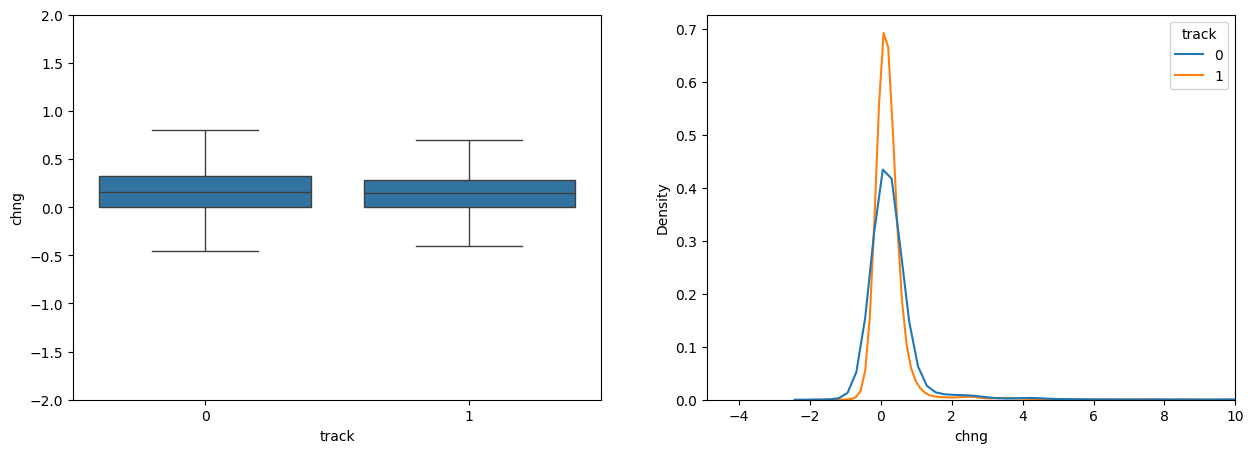

In [14]:
# Distribution of change times by track color
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=dog_perf_num, x='track', y='chng', fliersize=False)
plt.ylim(top=2,bottom=-2)
plt.subplot(122)
sns.kdeplot(data=dog_perf_num, x='chng', hue='track')
plt.xlim(right=10)

In [15]:
# Standard deviation of change times by track color
print(dog_perf_num[dog_perf_num['track']==0]['chng'].std())
print(dog_perf_num[dog_perf_num['track']==1]['chng'].std())

1.68992700519345
0.9493434822167782


<Axes: xlabel='breed'>

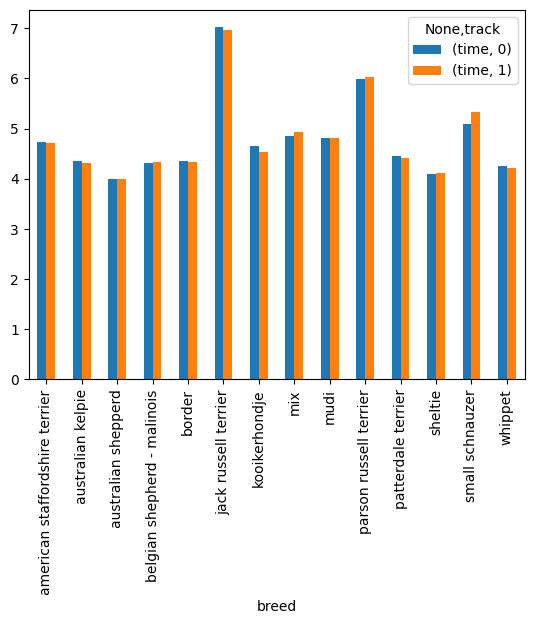

In [16]:
# Group by breed, and plot the mean runtimes by track color
dog_perf_num[['time','track','breed']].groupby(['track','breed']).mean(numeric_only=True).unstack(0).plot(kind='bar')

<Axes: xlabel='breed'>

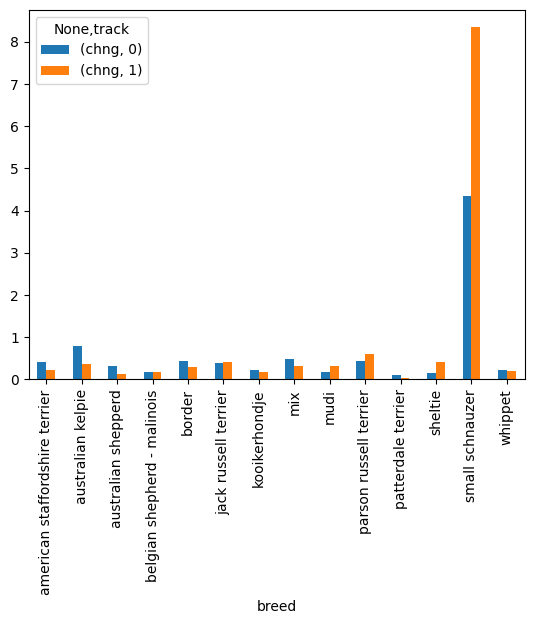

In [17]:
# Group by breed, and plot the mean change times by track color
dog_perf_num[['chng','track','breed']].groupby(['track','breed']).mean(numeric_only=True).unstack(0).plot(kind='bar')

In [18]:
# Check breed of Small schnauzer: Why the change time are twice on the red track than on the blue track?
dog_perf[dog_perf['breed']=='small schnauzer'] # No trend-like offset, thara is only one outlier that distort the mean value

,name,chng,time,track,location,when,breed,sex,castrated,hurdle_height,age
3662,Punk,12.84,6.58,1,Prostějov,2023-06-24 10:07:38,small schnauzer,female,neutral,15.0,7
3663,Punk,3.84,4.27,1,Prostějov,2023-06-24 10:08:59,small schnauzer,female,neutral,15.0,7
3664,Punk,Ok,5.13,1,Prostějov,2023-06-24 10:10:30,small schnauzer,female,neutral,15.0,7
3680,Punk,4.48,5.91,0,Prostějov,2023-06-24 11:11:52,small schnauzer,female,neutral,15.0,7
3681,Punk,3.46,3.02,0,Prostějov,2023-06-24 11:13:21,small schnauzer,female,neutral,15.0,7
3682,Punk,5.07,6.35,0,Prostějov,2023-06-24 11:15:01,small schnauzer,female,neutral,15.0,7


<Axes: xlabel='age'>

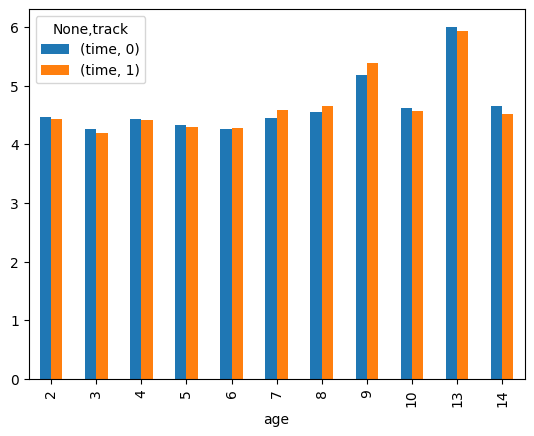

In [19]:
# Does age influence something?
dog_perf_num[['time','track','age']].groupby(['track','age']).mean().unstack(0).plot(kind='bar')

In [20]:
# What the influence of the castrate state?
dog_perf_num[['time','track','castrated']].groupby(['track','castrated']).mean()

time
track castrated          
0     neutral    4.501383
      sexual     4.471300
1     neutral    4.526238
      sexual     4.404672

<Axes: xlabel='sex'>

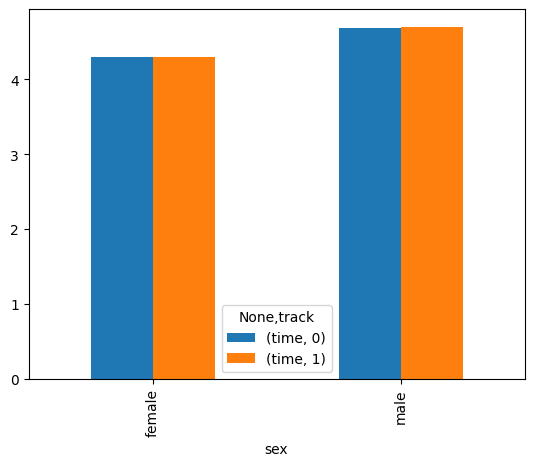

In [21]:
# And the influence of the sex?
dog_perf_num[['time','track','sex']].groupby(['track','sex']).mean().unstack(0).plot(kind='bar')

# Changeover analysis (sex and castrate state)

Brief background: 
- In a race, several dogs will race in a row, but the next dog may be of a different sex or castrate state from the dog that ran before it. Now, I check that if changing the sex or neuter status of the dog at the changeover will affect the running or changing times?

In [22]:
# First, create a new df where I collect the sex and castrate state of the racing dogs.

df_sex = df_onlywild.drop(columns=['Division','with who', 'W/L/T','Hurdles','track'])
df_sex = df_sex.join(df_alap[['sex']].add_suffix('_dog_1'), on='name')
df_sex = df_sex.join(df_alap[['sex']].add_suffix('_dog_2'), on='name.1')
df_sex = df_sex.join(df_alap[['sex']].add_suffix('_dog_3'), on='name.2')
df_sex = df_sex.join(df_alap[['sex']].add_suffix('_dog_4'), on='name.3')
df_sex

,who,total time,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,...,name.3,chng.2,4.dog,when,location,championship,sex_dog_1,sex_dog_2,sex_dog_3,sex_dog_4
0,wildrunners dreamers,17.01,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,...,Hector,0,4.13,2023-04-22 10:11:57,Heroltice,cz,female,male,male,male
1,wildrunners maximini,19.43,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,...,Bree,0,4.28,2023-04-22 10:11:57,Heroltice,cz,male,male,female,female
2,wildrunners dreamers,17.42,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,...,Hector,0,4.18,2023-04-22 10:13:25,Heroltice,cz,female,male,male,male
3,wildrunners maximini,18.59,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,...,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,cz,male,male,female,female
4,wildrunners dreamers,16.73,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,...,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,cz,female,male,male,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,wildrunners dreamers,16.15,Cookies,-0.16,3.94,Maggie,0.13,4.04,Sirius,0.21,...,Alfie,error,4.01,2023-10-15 16:02:38,Vodňany,cz,male,female,male,female
7072,wildrunners maximini,17.07,Nina,0.04,4.06,Brooke,0.19,4.12,Bree,0.26,...,Alex,0,4.22,2023-10-15 17:14:50,Vodňany,cz,female,male,female,male
7074,wildrunners maximini,17.06,Nina,0.10,4.13,Brooke,0,4.21,Bree,0.14,...,Alex,0.18,4.16,2023-10-15 17:15:52,Vodňany,cz,female,male,female,male
7076,wildrunners maximini,16.97,Nina,0.09,4.09,Brooke,0,4.31,Bree,0,...,Alex,NaN,4.17,2023-10-15 17:17:08,Vodňany,cz,female,male,female,male


In [23]:
# Now, introduce a new variable, what's indicates whether the sex or castrate state is changed or not.

df_sex['chng_1_sex_dif'] = 0
df_sex.loc[df_sex[df_sex['sex_dog_1']!=df_sex['sex_dog_2']].index,'chng_1_sex_dif'] = 1

df_sex['chng_2_sex_dif'] = 0
df_sex.loc[df_sex[df_sex['sex_dog_2']!=df_sex['sex_dog_3']].index,'chng_2_sex_dif'] = 1

df_sex['chng_3_sex_dif'] = 0
df_sex.loc[df_sex[df_sex['sex_dog_3']!=df_sex['sex_dog_4']].index,'chng_3_sex_dif'] = 1

df_sex

,who,total time,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,...,when,location,championship,sex_dog_1,sex_dog_2,sex_dog_3,sex_dog_4,chng_1_sex_dif,chng_2_sex_dif,chng_3_sex_dif
0,wildrunners dreamers,17.01,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,...,2023-04-22 10:11:57,Heroltice,cz,female,male,male,male,1,0,0
1,wildrunners maximini,19.43,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,...,2023-04-22 10:11:57,Heroltice,cz,male,male,female,female,0,1,0
2,wildrunners dreamers,17.42,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,...,2023-04-22 10:13:25,Heroltice,cz,female,male,male,male,1,0,0
3,wildrunners maximini,18.59,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,...,2023-04-22 10:13:25,Heroltice,cz,male,male,female,female,0,1,0
4,wildrunners dreamers,16.73,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,...,2023-04-22 10:15:06,Heroltice,cz,female,male,male,male,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,wildrunners dreamers,16.15,Cookies,-0.16,3.94,Maggie,0.13,4.04,Sirius,0.21,...,2023-10-15 16:02:38,Vodňany,cz,male,female,male,female,1,1,1
7072,wildrunners maximini,17.07,Nina,0.04,4.06,Brooke,0.19,4.12,Bree,0.26,...,2023-10-15 17:14:50,Vodňany,cz,female,male,female,male,1,1,1
7074,wildrunners maximini,17.06,Nina,0.10,4.13,Brooke,0,4.21,Bree,0.14,...,2023-10-15 17:15:52,Vodňany,cz,female,male,female,male,1,1,1
7076,wildrunners maximini,16.97,Nina,0.09,4.09,Brooke,0,4.31,Bree,0,...,2023-10-15 17:17:08,Vodňany,cz,female,male,female,male,1,1,1


1    440
2    298
0    230
3    129
Name: count, dtype: int64
5.823219064683985
6.364757223645324
8.875743703791386
6.227470451695791


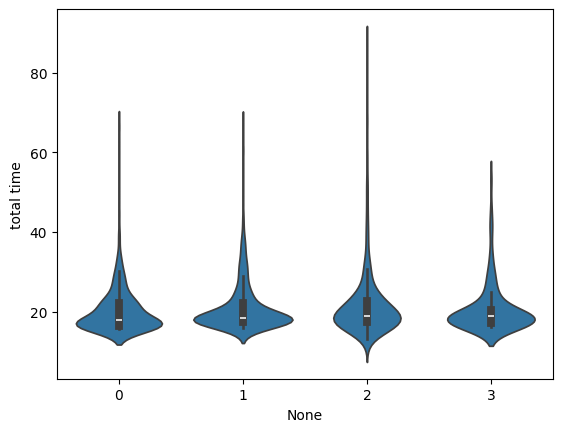

In [24]:
# First, I examine the total runtime according to sex composition of the team
sns.violinplot(data=df_sex,y='total time',x=(df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif']))

# Check the distribution of the cases
print((df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif']).value_counts())

# Calculate the standard deviation according to the number of sex changeovers
print(df_sex[(df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif'])==0]['total time'].std())
print(df_sex[(df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif'])==1]['total time'].std())
print(df_sex[(df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif'])==2]['total time'].std())
print(df_sex[(df_sex['chng_1_sex_dif']+df_sex['chng_2_sex_dif']+df_sex['chng_3_sex_dif'])==3]['total time'].std())

In [25]:
# Convert the previous df into a vertical df, where the same type variables are sorted into one column
df_sex_vert = pd.concat([df_sex[['name.1','chng','2.dog','chng_1_sex_dif']].rename(columns={'name.1': 'name','2.dog':'runtime','chng_1_sex_dif':'chng_sex_dif'}), 
                         df_sex[['name.2','chng.1','3.dog','chng_2_sex_dif']].rename(columns={'name.2': 'name','chng.1': 'chng','3.dog':'runtime','chng_2_sex_dif':'chng_sex_dif'}), 
                         df_sex[['name.3','chng.2','4.dog','chng_3_sex_dif']].rename(columns={'name.3': 'name','chng.2': 'chng','4.dog':'runtime','chng_3_sex_dif':'chng_sex_dif'})], ignore_index=True)
df_sex_vert.head()

,name,chng,runtime,chng_sex_dif
0,Dixie,0.3,4.24,1
1,Rocky,1.29,5.15,0
2,Dixie,0.15,4.23,1
3,Rocky,0.79,5.5,0
4,Dixie,-0.19,4.29,1


1.2696244325681574
1.789066506882677


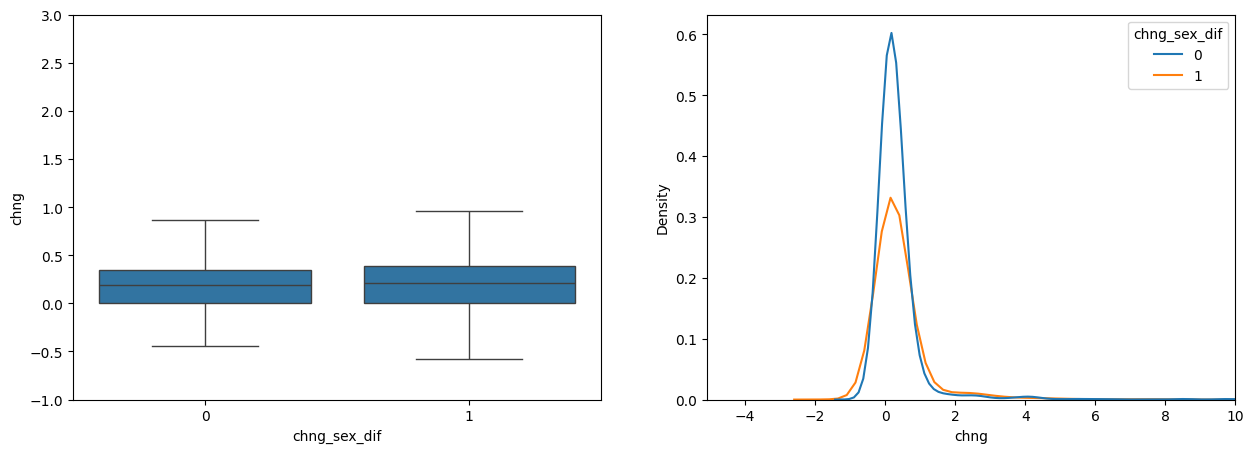

In [26]:
# Plot the change time according to whether there were changes in sex or not
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=df_sex_vert.apply(pd.to_numeric, errors='coerce'), x='chng_sex_dif', y='chng', fliersize=False)
plt.ylim(bottom=-1 , top=3)
plt.subplot(122)
sns.kdeplot(data=df_sex_vert.apply(pd.to_numeric, errors='coerce'), x='chng', hue='chng_sex_dif')
plt.xlim(right=10)

print(df_sex_vert[df_sex_vert['chng_sex_dif']==0].apply(pd.to_numeric, errors='coerce')['chng'].std())
print(df_sex_vert[df_sex_vert['chng_sex_dif']==1].apply(pd.to_numeric, errors='coerce')['chng'].std())

0.7239301969635338
0.7954935054148441


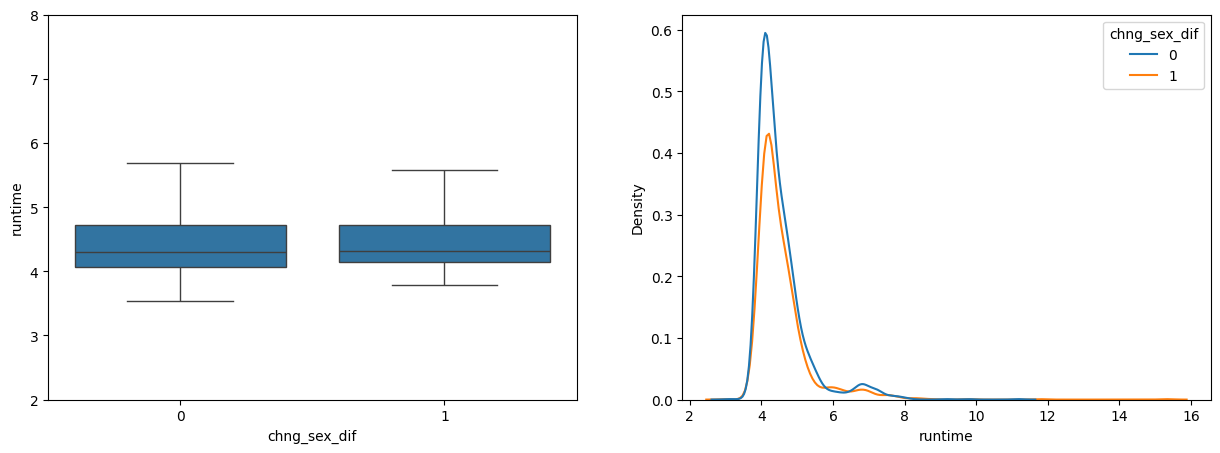

In [27]:
# Plot the runtime according to whether there were changes in sex or not
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=df_sex_vert.apply(pd.to_numeric, errors='coerce'), x='chng_sex_dif', y='runtime', fliersize=False)
plt.ylim(bottom=2 , top=8)
plt.subplot(122)
sns.kdeplot(data=df_sex_vert.apply(pd.to_numeric, errors='coerce'), x='runtime', hue='chng_sex_dif')

print(df_sex_vert[df_sex_vert['chng_sex_dif']==0].apply(pd.to_numeric, errors='coerce')['runtime'].std())
print(df_sex_vert[df_sex_vert['chng_sex_dif']==1].apply(pd.to_numeric, errors='coerce')['runtime'].std())

In [28]:
# Check the same things as above but now according to that the dog is castrated or not (castrate state)
# Concat the castrate state to the basic df

df_castrated = df_onlywild.drop(columns=['Division','with who', 'W/L/T','Hurdles','track']) # Preceding dog analyis
df_castrated = df_castrated.join(df_alap[['castrated']].add_suffix('_dog_1'), on='name')
df_castrated = df_castrated.join(df_alap[['castrated']].add_suffix('_dog_2'), on='name.1')
df_castrated = df_castrated.join(df_alap[['castrated']].add_suffix('_dog_3'), on='name.2')
df_castrated = df_castrated.join(df_alap[['castrated']].add_suffix('_dog_4'), on='name.3')

# Create a new variable to indicate the castrate state changeovers
df_castrated['chng_1_castrated_dif'] = 0
df_castrated.loc[df_sex[df_castrated['castrated_dog_1']!=df_castrated['castrated_dog_2']].index,'chng_1_castrated_dif'] = 1

df_castrated['chng_2_castrated_dif'] = 0
df_sex.loc[df_sex[df_castrated['castrated_dog_2']!=df_castrated['castrated_dog_3']].index,'chng_2_castrated_dif'] = 1

df_castrated['chng_3_castrated_dif'] = 0
df_castrated.loc[df_sex[df_castrated['castrated_dog_3']!=df_castrated['castrated_dog_4']].index,'chng_3_castrated_dif'] = 1

df_castrated.head()

,who,total time,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,...,when,location,championship,castrated_dog_1,castrated_dog_2,castrated_dog_3,castrated_dog_4,chng_1_castrated_dif,chng_2_castrated_dif,chng_3_castrated_dif
0,wildrunners dreamers,17.01,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,...,2023-04-22 10:11:57,Heroltice,cz,neutral,neutral,neutral,sexual,0,0,1
1,wildrunners maximini,19.43,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,...,2023-04-22 10:11:57,Heroltice,cz,sexual,neutral,neutral,neutral,1,0,0
2,wildrunners dreamers,17.42,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,...,2023-04-22 10:13:25,Heroltice,cz,neutral,neutral,neutral,sexual,0,0,1
3,wildrunners maximini,18.59,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,...,2023-04-22 10:13:25,Heroltice,cz,sexual,neutral,neutral,neutral,1,0,0
4,wildrunners dreamers,16.73,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,...,2023-04-22 10:15:06,Heroltice,cz,neutral,neutral,neutral,sexual,0,0,1


7.813820933597917
6.330641767110071
8.415115065199602
nan


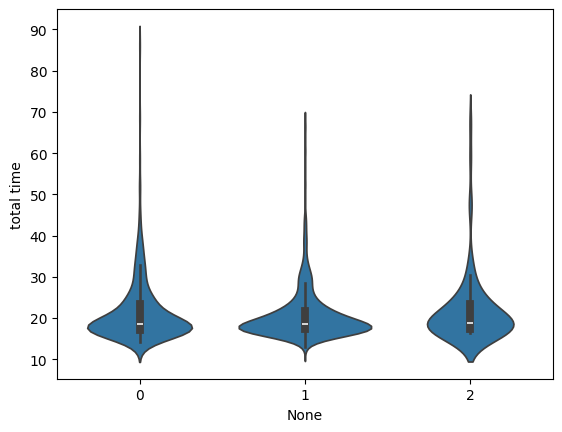

In [29]:
# First, I examine the total runtime according to castrate state composition of the team
sns.violinplot(data=df_castrated,y='total time',x=(df_castrated['chng_1_castrated_dif']+df_castrated['chng_2_castrated_dif']+df_castrated['chng_3_castrated_dif']))

# Then, check the standard deviation according the number of castrate state changeovers
print(df_castrated[(df_castrated['chng_1_castrated_dif']+df_castrated['chng_2_castrated_dif']+df_castrated['chng_3_castrated_dif'])==0]['total time'].std())
print(df_castrated[(df_castrated['chng_1_castrated_dif']+df_castrated['chng_2_castrated_dif']+df_castrated['chng_3_castrated_dif'])==1]['total time'].std())
print(df_castrated[(df_castrated['chng_1_castrated_dif']+df_castrated['chng_2_castrated_dif']+df_castrated['chng_3_castrated_dif'])==2]['total time'].std())
print(df_castrated[(df_castrated['chng_1_castrated_dif']+df_castrated['chng_2_castrated_dif']+df_castrated['chng_3_castrated_dif'])==3]['total time'].std())

In [30]:
# Convert the df into a vertical df, to make sure the same type of data are in one column
df_castrated_vert = pd.concat([df_castrated[['name.1','chng','2.dog','chng_1_castrated_dif']].rename(columns={'name.1': 'name','2.dog':'runtime','chng_1_castrated_dif':'chng_castrated_dif'}), 
                          df_castrated[['name.2','chng.1','3.dog','chng_2_castrated_dif']].rename(columns={'name.2': 'name','chng.1': 'chng','3.dog':'runtime','chng_2_castrated_dif':'chng_castrated_dif'}), 
                          df_castrated[['name.3','chng.2','4.dog','chng_3_castrated_dif']].rename(columns={'name.3': 'name','chng.2': 'chng','4.dog':'runtime','chng_3_castrated_dif':'chng_castrated_dif'})], ignore_index=True)
df_castrated_vert.head()

,name,chng,runtime,chng_castrated_dif
0,Dixie,0.3,4.24,0
1,Rocky,1.29,5.15,1
2,Dixie,0.15,4.23,0
3,Rocky,0.79,5.5,1
4,Dixie,-0.19,4.29,0


In [31]:
# Concat the sex changeovers and the castrate state changeovers into one df
sex_castrated_corr = pd.concat([df_sex_vert, df_castrated_vert['chng_castrated_dif'], df_sex_vert['chng_sex_dif']+df_castrated_vert['chng_castrated_dif']], axis=1).copy()
sex_castrated_corr.head()

,name,chng,runtime,chng_sex_dif,chng_castrated_dif,0
0,Dixie,0.3,4.24,1,0,1
1,Rocky,1.29,5.15,0,1,1
2,Dixie,0.15,4.23,1,0,1
3,Rocky,0.79,5.5,0,1,1
4,Dixie,-0.19,4.29,1,0,1


In [32]:
# Check the standard deviations of change times whether sex or castrate state changover happened
print(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==0].apply(pd.to_numeric, errors='coerce')['chng'].std())
print(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==1].apply(pd.to_numeric, errors='coerce')['chng'].std())

print(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==0].apply(pd.to_numeric, errors='coerce')['chng'].std())
print(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==1].apply(pd.to_numeric, errors='coerce')['chng'].std())

print(sex_castrated_corr[sex_castrated_corr[0]==0].apply(pd.to_numeric, errors='coerce')['chng'].std())
print(sex_castrated_corr[sex_castrated_corr[0]==1].apply(pd.to_numeric, errors='coerce')['chng'].std())
print(sex_castrated_corr[sex_castrated_corr[0]==2].apply(pd.to_numeric, errors='coerce')['chng'].std())

1.2696244325681574
1.789066506882677
1.0048206201892134
2.4748068891504307
0.9747993439588906
1.3457383104275156
3.1957867893842984


In [33]:
# Check the standard deviations of runtimes whether sex or castrate state changover happened
print(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==0].apply(pd.to_numeric, errors='coerce')['runtime'].std())
print(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==1].apply(pd.to_numeric, errors='coerce')['runtime'].std())

print(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==0].apply(pd.to_numeric, errors='coerce')['runtime'].std())
print(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==1].apply(pd.to_numeric, errors='coerce')['runtime'].std())

print(sex_castrated_corr[sex_castrated_corr[0]==0].apply(pd.to_numeric, errors='coerce')['runtime'].std())
print(sex_castrated_corr[sex_castrated_corr[0]==1].apply(pd.to_numeric, errors='coerce')['runtime'].std())
print(sex_castrated_corr[sex_castrated_corr[0]==2].apply(pd.to_numeric, errors='coerce')['runtime'].std())

0.7239301969635338
0.7954935054148441
0.724429408510828
0.8429082849750535
0.6807514285323142
0.7904080159837369
0.863479289108424


Text(2.13, 3.75, ' Std \n3.2 sec')

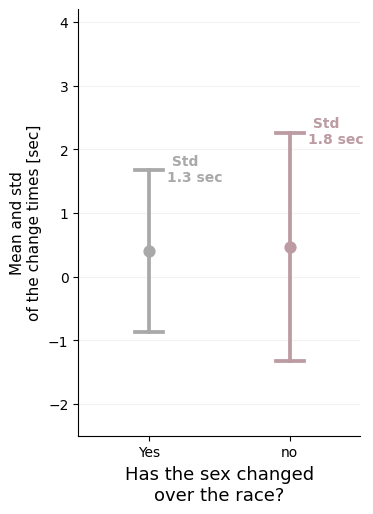

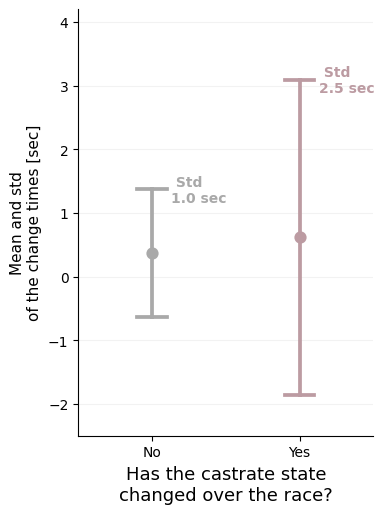

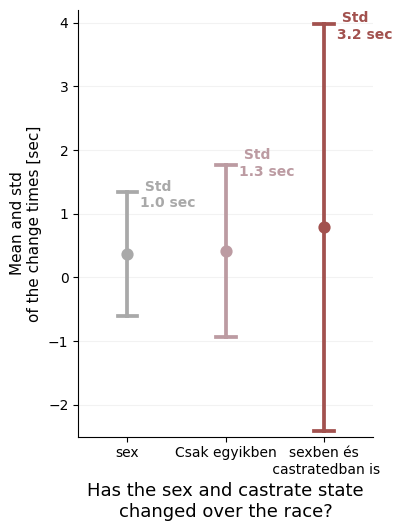

In [36]:
# According to the above values, there are great variations in the std. Let's plot these.
my_pal = {'0': '#A9A9A9', '1': '#BC9BA2', '2': '#a2514e'} # Define my custom color palette

fig = sns.catplot(
    data=sex_castrated_corr.apply(pd.to_numeric, errors='coerce'), y='chng', x='chng_sex_dif',
    capsize=.2, errorbar="sd", aspect=0.75,
    kind="point", palette=my_pal)
fig.set_xticklabels(['Yes', 'no']);
plt.xlabel(r'Has the sex changed''\n''over the race?', fontsize=13)
plt.ylabel(r"Mean and std""\n"r"of the change times [sec]", fontsize=11)
plt.grid(axis='y', color='0.95')
plt.ylim(top=4.2, bottom=-2.5)
ax = fig.facet_axis(0,0)
# add annotations
ax.text(0.13, 1.5, ' Std ''\n' + str(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==0].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1)) + ' sec', fontsize=10, color="#A9A9A9", weight = 'bold')
ax.text(1.13, 2.1, ' Std ''\n' +  str(sex_castrated_corr[sex_castrated_corr['chng_sex_dif']==1].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1))+ ' sec', fontsize=10, color="#BC9BA2", weight = 'bold')


fig = sns.catplot(
    data=sex_castrated_corr.apply(pd.to_numeric, errors='coerce'), y='chng', x='chng_castrated_dif',
    capsize=.2, errorbar="sd", aspect=0.75,
    kind="point", palette=my_pal)
fig.set_xticklabels(['No', 'Yes']);
plt.xlabel(r'Has the castrate state''\n''changed over the race?', fontsize=13)
plt.ylabel(r"Mean and std""\n"r"of the change times [sec]", fontsize=11)
plt.grid(axis='y', color='0.95')
plt.ylim(top=4.2, bottom=-2.5)
ax = fig.facet_axis(0,0)
ax.text(0.13, 1.17, ' Std ''\n' + str(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==0].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1)) + ' sec', fontsize=10, color="#A9A9A9", weight = 'bold')
ax.text(1.13, 2.9, ' Std ''\n' +  str(sex_castrated_corr[sex_castrated_corr['chng_castrated_dif']==1].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1))+ ' sec', fontsize=10, color="#BC9BA2", weight = 'bold')


fig = sns.catplot(
    data=sex_castrated_corr.apply(pd.to_numeric, errors='coerce'), y='chng', x=0,
    capsize=.2, errorbar="sd", aspect=0.75,
    kind="point", palette=my_pal)
fig.set_xticklabels(['sex', 'Csak egyikben', 'sexben és''\n'' castratedban is']);
plt.xlabel(r'Has the sex and castrate state''\n''changed over the race?', fontsize=13)
plt.ylabel(r"Mean and std""\n"r"of the change times [sec]", fontsize=11)
plt.grid(axis='y', color='0.95')
plt.ylim(top=4.2, bottom=-2.5)
ax = fig.facet_axis(0,0)
ax.text(0.13, 1.1, ' Std ''\n' + str(sex_castrated_corr[sex_castrated_corr[0]==0].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1)) + ' sec', fontsize=10, color="#A9A9A9", weight = 'bold')
ax.text(1.13, 1.6, ' Std ''\n' +  str(sex_castrated_corr[sex_castrated_corr[0]==1].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1))+ ' sec', fontsize=10, color="#BC9BA2", weight = 'bold')
ax.text(2.13, 3.75, ' Std ''\n' +  str(sex_castrated_corr[sex_castrated_corr[0]==2].apply(pd.to_numeric, errors='coerce')['chng'].std().round(1))+ ' sec', fontsize=10, color="#a2514e", weight = 'bold')

# Create Pivot tables for the team's coach

In [37]:
# Group values according to the race locations and dates
df_numeric = df_onlywild.copy()
numeric_columns = ['start', '1.dog', 'chng', '2.dog', 'chng.1', '3.dog', 'chng.2', '4.dog']
df_numeric[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a summary pivot table
table = pd.pivot_table(df_numeric,index=["championship","location",df_numeric['when'].dt.date],
               values=['total time','1.dog',"2.dog","3.dog","4.dog",'start',"chng","chng.1","chng.2"],
               aggfunc={'total time': [np.median, np.std],
                        '1.dog': [np.median, np.std],
                        '2.dog': [np.median, np.std],
                        '3.dog': [np.median, np.std],
                        '4.dog': [np.median, np.std],
                        'start': [np.median, np.std],
                        'chng': [np.median, np.std],
                        'chng.1': [np.median, np.std],
                        'chng.2': [np.median, np.std],},fill_value=0,sort=False)

table.to_excel('times_pivot_table.xlsx')

In [38]:
# Define a custom aggregation function to summarize the running error values
def count_error_time(x):
    return ((((x =='outside') | (x =='ran in')).sum())/len(x)*100).round(2)

# Define a custom aggregation function to summarize the chenging error values
def count_error_chng(x):
    return ((((x =='error') | (x.astype(str).str.contains('-'))).sum())/len(x)*100).round(2)

# Summary table for error ratios, then export it to an Excel file
table = pd.pivot_table(df_onlywild,index=["championship","location",df_onlywild['when'].dt.date],
               values=["1.dog","2.dog","3.dog","4.dog",'start',"chng","chng.1","chng.2"],
               aggfunc= {'1.dog': count_error_time,
                        '2.dog': count_error_time,
                        '3.dog': count_error_time,
                        '4.dog': count_error_time,
                        'start': count_error_chng,
                        'chng': count_error_chng,
                        'chng.1': count_error_chng,
                        'chng.2': count_error_chng}, fill_value=0,sort=False)
# Rename the pivot table columns
table.rename(columns={'1.dog': '1.dog error rate',
                      '2.dog':'2.dog error rate',
                      '3.dog':'3.dog error rate',
                      '4.dog':'4.dog error rate',
                      'chng':'chng error rate',
                      'chng.1':'chng.1 error rate',
                      'chng.2':'chng.2 error rate',
                      'start':'start error rate'}, inplace=True)
desired_order = ['1.dog error rate', '2.dog error rate', '3.dog error rate',
       '4.dog error rate', 'start error rate', 'chng error rate', 'chng.1 error rate','chng.2 error rate']
table = table.reindex(columns=desired_order)

table.to_excel('errors_pivot_table.xlsx')

In [39]:
# Now create a pivot table to summarize the results of each race location 
table = pd.pivot_table(df_onlywild,index=["championship","location",df_onlywild['when'].dt.date],
               values=["total time"],
               aggfunc={'total time': [np.median, np.std]},fill_value=0,sort=False)
# Rename table column names
table.rename(columns={'median': 'Median value', 'std':'Standard deviation'}, inplace=True)

table.style.format('{0:,.1f} sec').bar(color='#d65f5f')

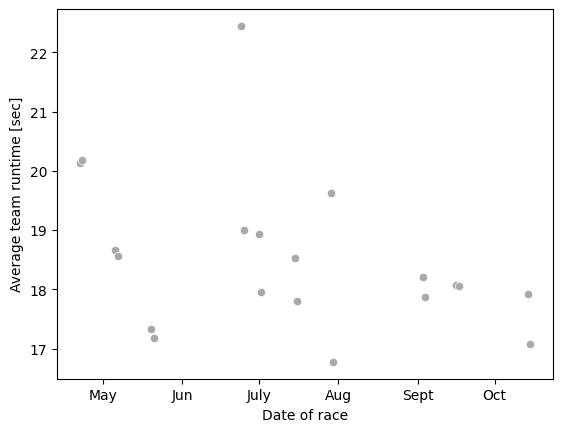

In [40]:
# Average team runtime as a function of season dates
fig = sns.scatterplot(data = df_onlywild['total time'].groupby(by=df_onlywild['when'].dt.date).median().reset_index(), x='when', y='total time', color='#A9A9A9')
plt.xlabel('Date of race')
plt.ylabel('Average team runtime [sec]')
fig.set_xticklabels(['May', 'Jun', 'July', 'Aug', 'Sept', 'Oct']);

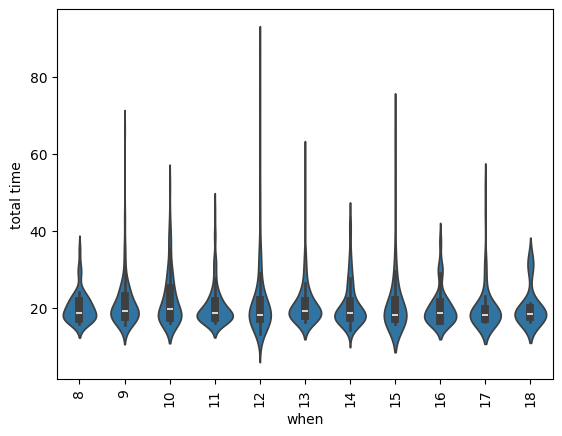

In [41]:
# Distribution of team runtimes within a race day
sns.violinplot(x=df_onlywild['when'].dt.hour,y=df_onlywild['total time'])
plt.xticks(rotation=90);

In [42]:
# Pivot table for runtime analysis
table = pd.pivot_table(df_numeric,index=["championship","location",df_numeric['when'].dt.date],
               values=['1.dog',"2.dog","3.dog","4.dog"],
               aggfunc=[np.median, np.std],fill_value=0,sort=False)
# Rename columns
table.rename(columns={'median': 'Median value of the run times', 'std':'Standard deviation of the run times'}, inplace=True)
# Highlight the outliers
table.style.format('{0:,.1f} sec').bar(color='#d65f5f')

In [43]:
# Pivot table for change time analysis
table = pd.pivot_table(df_numeric,index=["championship","location",df_numeric['when'].dt.date],
               values=['start',"chng","chng.1","chng.2"],
               aggfunc=[np.median, np.std],fill_value=0)
# Rename columns
table.rename(columns={'median': 'Median value of the change times', 'std':'Standard deviation of the change times'}, inplace=True)
# Reorder columns
desired_order = [(      'Median value of the change times',  'start'),
                 (      'Median value of the change times',   'chng'),
            (      'Median value of the change times', 'chng.1'),
            (      'Median value of the change times', 'chng.2'),
            ('Standard deviation of the change times',  'start'),
            ('Standard deviation of the change times',   'chng'),
            ('Standard deviation of the change times', 'chng.1'),
            ('Standard deviation of the change times', 'chng.2')]
table = table.reindex(columns=desired_order)
# For highlighting the outliers
table.style.format('{0:,.2f} sec').bar(color='#d65f5f')

In [44]:
# Summarize the running error-ratios
table = pd.pivot_table(df_onlywild,index=["championship","location",df_onlywild['when'].dt.date],
               values=["1.dog","2.dog","3.dog","4.dog"],
               aggfunc= count_error_time, fill_value=0)
# Calculate mean across columns for each row
table['Average running error ratio'] = table.apply(lambda row: row.mean(), axis=1)
# Highlight the outliers
table.style.format('{0:,.1f}%').bar(color='#d65f5f')

In [45]:
# Summarize the changing error-ratios
table = pd.pivot_table(df_onlywild,index=["championship","location",df_onlywild['when'].dt.date],
               values=["start","chng","chng.1","chng.2"],
               aggfunc= count_error_chng, fill_value=0)
# Reorder the columns
desired_order = ['start', 'chng', 'chng.1', 'chng.2', 'Average chng error ratio']
table = table.reindex(columns=desired_order)
# Calculate mean across columns for each row
table['Average chng error ratio'] = table.apply(lambda row: row.mean(), axis=1)
# Highlight the outliers
table.style.format('{0:,.2f}%').bar(color='#d65f5f')

<Axes: xlabel='location'>

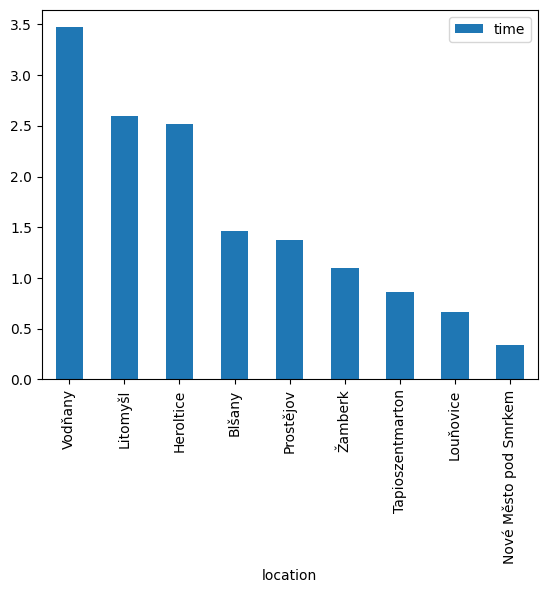

In [46]:
# Running errors by race locations
dog_perf[['location','time']].groupby(by='location').agg(count_error_time).sort_values(by='time',ascending=False).plot(kind='bar')

<Axes: xlabel='location'>

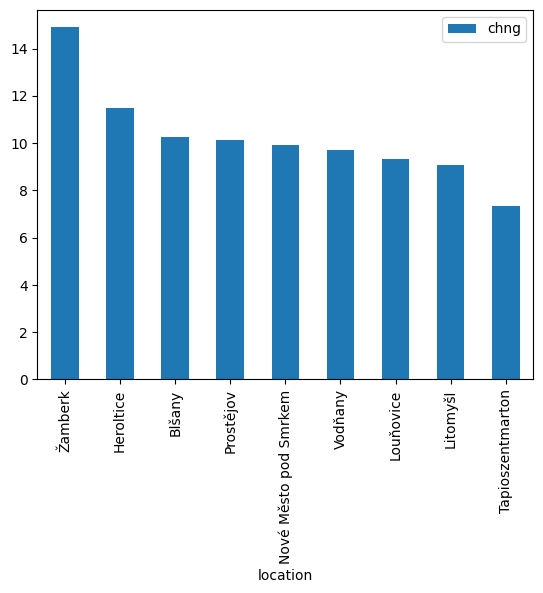

In [47]:
# Changing errors by race locations
dog_perf[['location','chng']].groupby(by='location').agg(count_error_chng).sort_values(by='chng',ascending=False).plot(kind='bar')

# Analyse the effect of weather

In [48]:
import requests
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

## Geocoding locations: get the coordinates of each race location with an API

In [49]:
# Define the geocoding library
geolocator = Nominatim(user_agent="Nancy Amandi", timeout= 10) # define a general user
fgeocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.1) # for stable workflow, define a delay between requests

In [50]:
# get the coordinates for each unique location (this is an optimalized way to geocoding, as we don't have to geocode each row, because there are a lot of duplicates)
locations = pd.DataFrame()
locations['names'] = df_onlywild['location'].drop_duplicates().copy()
locations['geolocated'] = locations['names'].apply(fgeocode)

# Print the result: unique locations and its geolocated informations
locations

,names,geolocated
0,Heroltice,"(Heroltice, okres Brno-venkov, Jihomoravský kr..."
853,Žamberk,"(Žamberk, okres Ústí nad Orlicí, Pardubický kr..."
1547,Blšany,"(Blšany, okres Louny, Ústecký kraj, 439 88, Če..."
2788,Prostějov,"(Prostějov, okres Prostějov, Olomoucký kraj, S..."
3203,Nové Město pod Smrkem,"(Nové Město pod Smrkem, okres Liberec, Liberec..."
4003,Louňovice,"(Louňovice, okres Praha-východ, Střední Čechy,..."
7096,Tapioszentmarton,"(Tápiószentmárton, Nagykátai járás, Pest várme..."
5065,Litomyšl,"(Litomyšl, okres Svitavy, Pardubický kraj, Sev..."
6362,Vodňany,"(Vodňany, okres Strakonice, Jihozápad, 389 01,..."


In [51]:
# Pair the geocoded information for each row in the original df
def paring_locations(row):
    ind = locations[row == locations['names']].index
    return locations['geolocated'].loc[ind].item()

# Finally, apply the custom defined function
df_onlywild['gps_coords'] = df_onlywild['location'].apply(paring_locations)
df_onlywild['gps_coords']

0       (Heroltice, okres Brno-venkov, Jihomoravský kr...
1       (Heroltice, okres Brno-venkov, Jihomoravský kr...
2       (Heroltice, okres Brno-venkov, Jihomoravský kr...
3       (Heroltice, okres Brno-venkov, Jihomoravský kr...
4       (Heroltice, okres Brno-venkov, Jihomoravský kr...
                              ...                        
7049    (Vodňany, okres Strakonice, Jihozápad, 389 01,...
7072    (Vodňany, okres Strakonice, Jihozápad, 389 01,...
7074    (Vodňany, okres Strakonice, Jihozápad, 389 01,...
7076    (Vodňany, okres Strakonice, Jihozápad, 389 01,...
7078    (Vodňany, okres Strakonice, Jihozápad, 389 01,...
Name: gps_coords, Length: 1097, dtype: object

In [52]:
# Check the result, print the first row's lat and lon coords
print(df_onlywild['gps_coords'].loc[1].latitude)
print(df_onlywild['gps_coords'].loc[1].longitude)

49.3114133
16.4127991


## Get the historical weather data according to race locations and date

In [53]:
# We need the exact location and date, so I collect this information to a new df. Then, I drop the duplicates here too for the optimal API usage:
get_wthr_data = pd.DataFrame()
get_wthr_data['date'] = df_onlywild['when'].apply(lambda x: x.strftime('%Y-%m-%d'))
get_wthr_data['lat'] = df_onlywild['gps_coords'].apply(lambda x: x.latitude)
get_wthr_data['lon'] = df_onlywild['gps_coords'].apply(lambda x: x.longitude)
get_wthr_data.drop_duplicates(subset=['date'], inplace=True) # Drop the duplicates
get_wthr_data

,date,lat,lon
0,2023-04-22,49.311413,16.412799
108,2023-04-23,49.311413,16.412799
853,2023-05-06,50.087143,16.465089
1164,2023-05-07,50.087143,16.465089
1547,2023-05-20,50.217334,13.471201
1879,2023-05-21,50.217334,13.471201
2788,2023-06-24,49.472147,17.111798
2968,2023-06-25,49.472147,17.111798
3203,2023-07-01,50.925473,15.229975
3561,2023-07-02,50.925473,15.229975


In [54]:
# Get the weather the for each race day and store the data in a dictionary
weather_data = {}
for index, row in get_wthr_data.iterrows():
    case = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude='+str(row['lat'])+'&longitude='+str(row['lon'])+'&start_date='+row['date']+'&end_date='+row['date']+'&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_gusts_10m&timezone=Europe%2FBerlin')
    weather_data[row['date']] = pd.DataFrame(case.json()['hourly'])

# Print the first few row of the first race day to check the correctness of the result
weather_data['2023-04-22'].head()

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_gusts_10m
0,2023-04-22T00:00,7.9,74,0.0,7.6,14.8
1,2023-04-22T01:00,7.8,70,0.0,8.0,14.8
2,2023-04-22T02:00,7.2,73,0.0,8.1,15.5
3,2023-04-22T03:00,6.7,74,0.0,6.4,14.0
4,2023-04-22T04:00,6.2,76,0.0,6.3,11.5


In [55]:
# Concat the weather data to the race data
df_onlywild_weather = pd.DataFrame()
for date in df_onlywild['when']:
    daily_weahter = weather_data[date.strftime('%Y-%m-%d')] # Choose the data to get the right element of the dictionary
    df_onlywild_weather = pd.concat([df_onlywild_weather, daily_weahter[daily_weahter['time'].astype('datetime64[ns]').dt.hour == date.hour][['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'wind_gusts_10m']]], ignore_index=True) 

# Rename the variables for easier management
df_onlywild.reset_index(inplace=True, drop=True)
df_onlywild_weather = pd.concat([df_onlywild, df_onlywild_weather], axis=1, ignore_index=True)
df_onlywild_weather.columns = ['Division', 'who', 'with who', 'total time', 'W/L/T', 'Hurdles', 'name',
       'start', '1.dog', 'name.1', 'chng', '2.dog', 'name.2', 'chng.1',
       '3.dog', 'name.3', 'chng.2', '4.dog', 'when', 'location', 'track',
       'championship', 'gps_coords', 'temperature', 'humidity', 'precipitation',
       'wind_speed', 'wind_gusts']
df_onlywild_weather.drop(columns=['Division', 'with who', 'gps_coords'], inplace=True)

# Check the result
df_onlywild_weather

,who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,...,4.dog,when,location,track,championship,temperature,humidity,precipitation,wind_speed,wind_gusts
0,wildrunners dreamers,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,...,4.13,2023-04-22 10:11:57,Heroltice,0,cz,15.6,49,0.0,7.1,18.0
1,wildrunners maximini,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,...,4.28,2023-04-22 10:11:57,Heroltice,1,cz,15.6,49,0.0,7.1,18.0
2,wildrunners dreamers,17.42,W,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,...,4.18,2023-04-22 10:13:25,Heroltice,0,cz,15.6,49,0.0,7.1,18.0
3,wildrunners maximini,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,...,4.28,2023-04-22 10:13:25,Heroltice,1,cz,15.6,49,0.0,7.1,18.0
4,wildrunners dreamers,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,...,4.08,2023-04-22 10:15:06,Heroltice,0,cz,15.6,49,0.0,7.1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,wildrunners dreamers,16.15,L,27.5,Cookies,-0.16,3.94,Maggie,0.13,4.04,...,4.01,2023-10-15 16:02:38,Vodňany,0,cz,9.5,60,0.0,18.8,40.0
1093,wildrunners maximini,17.07,W,27.5,Nina,0.04,4.06,Brooke,0.19,4.12,...,4.22,2023-10-15 17:14:50,Vodňany,1,cz,9.2,58,0.1,21.9,42.8
1094,wildrunners maximini,17.06,W,27.5,Nina,0.10,4.13,Brooke,0,4.21,...,4.16,2023-10-15 17:15:52,Vodňany,1,cz,9.2,58,0.1,21.9,42.8
1095,wildrunners maximini,16.97,L,27.5,Nina,0.09,4.09,Brooke,0,4.31,...,4.17,2023-10-15 17:17:08,Vodňany,1,cz,9.2,58,0.1,21.9,42.8


In [57]:
# Create a vertical df and concat the dog's base data
dog_perf = pd.concat([df_onlywild_weather[['Hurdles','name','start','1.dog','track','location','when','championship','temperature','humidity','precipitation','wind_speed','wind_gusts']], 
                      df_onlywild_weather[['Hurdles','name.1','chng','2.dog','track','location','when','championship','temperature','humidity','precipitation','wind_speed','wind_gusts']].rename(columns={'name.1': 'name','chng': 'start','2.dog':'1.dog'}), 
                      df_onlywild_weather[['Hurdles','name.2','chng.1','3.dog','track','location','when','championship','temperature','humidity','precipitation','wind_speed','wind_gusts']].rename(columns={'name.2': 'name','chng.1': 'start','3.dog':'1.dog'}), 
                      df_onlywild_weather[['Hurdles','name.3','chng.2','4.dog','track','location','when','championship','temperature','humidity','precipitation','wind_speed','wind_gusts']].rename(columns={'name.3': 'name','chng.2': 'start','4.dog':'1.dog'})], ignore_index=True)
dog_perf = dog_perf.join(df_alap, on='name')
dog_perf.drop(['host','birth_date','chip_number','ulna_length','hurdle_height'],axis=1,inplace=True)
dog_perf.rename(columns={'start':'chng','1.dog':'time','Hurdles':'hurdle_height'},inplace=True)
dog_perf.head()

,hurdle_height,name,chng,time,track,location,when,championship,temperature,humidity,precipitation,wind_speed,wind_gusts,breed,sex,castrated,age
0,25.0,Sunny,-0.24,4.21,0,Heroltice,2023-04-22 10:11:57,cz,15.6,49,0.0,7.1,18.0,belgian shepherd - malinois,female,neutral,4
1,25.0,Brooke,-0.11,4.08,1,Heroltice,2023-04-22 10:11:57,cz,15.6,49,0.0,7.1,18.0,border,male,sexual,3
2,25.0,Sunny,0.02,4.25,0,Heroltice,2023-04-22 10:13:25,cz,15.6,49,0.0,7.1,18.0,belgian shepherd - malinois,female,neutral,4
3,25.0,Brooke,-0.63,4.25,1,Heroltice,2023-04-22 10:13:25,cz,15.6,49,0.0,7.1,18.0,border,male,sexual,3
4,25.0,Sunny,-0.06,4.21,0,Heroltice,2023-04-22 10:15:06,cz,15.6,49,0.0,7.1,18.0,belgian shepherd - malinois,female,neutral,4


In [59]:
# Convert the change and runtimes to num type
dog_perf_num = dog_perf[['name','chng','time','breed','track', 'championship' ,'temperature','humidity','precipitation','wind_speed','wind_gusts', 'sex','castrated','hurdle_height','age','location']].copy()
numeric_columns = ['chng','time']
dog_perf_num[numeric_columns] = dog_perf_num[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Effect of temperature

### Run and change times

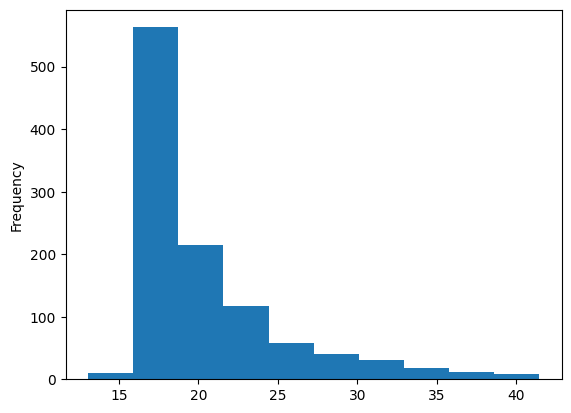

In [60]:
# Remove outliers: where the total race time exceeds the mean+3*std threshold, because some values are very far from the mean and that distort the distribution
df_onlywild_weather[df_onlywild_weather['total time'] < (df_onlywild_weather['total time'].mean() + df_onlywild_weather['total time'].std()*3)]['total time'].plot(kind='hist')
df_onlywild_weather['total time'] = df_onlywild_weather[df_onlywild_weather['total time'] < (df_onlywild_weather['total time'].mean() + df_onlywild_weather['total time'].std()*3)]['total time'].copy()

In [61]:
# Summarize the weather data by location
dog_perf_num[['location','temperature','humidity','precipitation']].groupby(by='location').mean()

,temperature,humidity,precipitation
location,,,
Blšany,19.621277,63.393617,0.063830
Heroltice,15.806918,55.088050,0.000000
Litomyšl,21.945455,61.623377,0.000000
Louňovice,26.350667,48.120000,0.000000
Nové Město pod Smrkem,19.635570,58.798658,0.051678
Prostějov,21.263934,60.273224,0.008197
Tapioszentmarton,27.339655,49.758621,0.051724
Vodňany,14.323611,63.611111,0.026389
Žamberk,12.119118,76.029412,0.206618


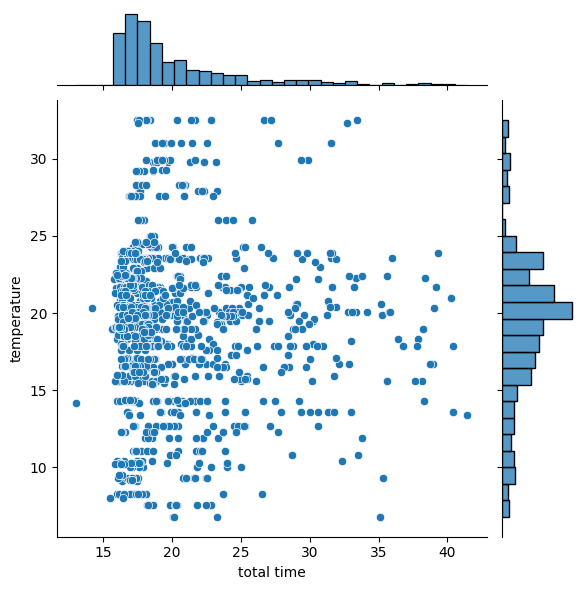

In [62]:
# Distribution of temperature data by team runtime
sns.jointplot(data=df_onlywild_weather, y='temperature', x='total time')

<Axes: xlabel='temperature', ylabel='total time'>

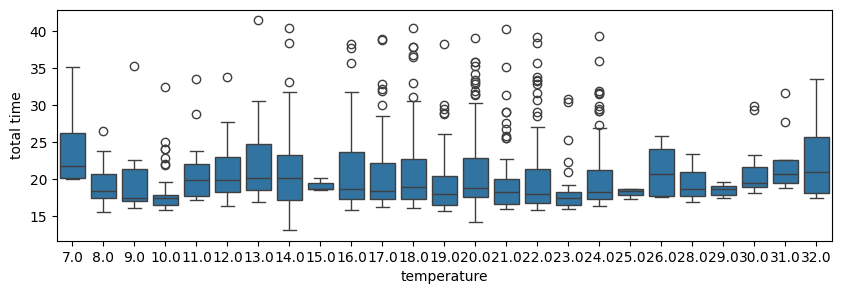

In [63]:
# Team runtime as a function of temperature
plt.figure(figsize=(10,3))
sns.boxplot(data=df_onlywild_weather,x=df_onlywild_weather['temperature'].round(0), y='total time')

<Axes: xlabel='total time', ylabel='Density'>

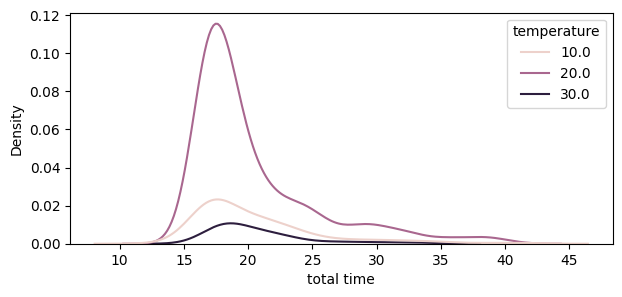

In [64]:
# Distribution of the total runtime by temperature bands
plt.figure(figsize=(7,3))
sns.kdeplot(data=df_onlywild_weather, x='total time', hue=df_onlywild_weather['temperature'].round(-1))

<Axes: xlabel='temperature', ylabel='Count'>

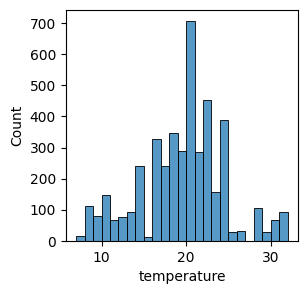

In [65]:
# Basic distribution for the individual runtimes
plt.figure(figsize=(3,3))
sns.histplot(data=dog_perf_num, x=dog_perf_num['temperature'].round(0), bins=25)

(2.405, 7.0)

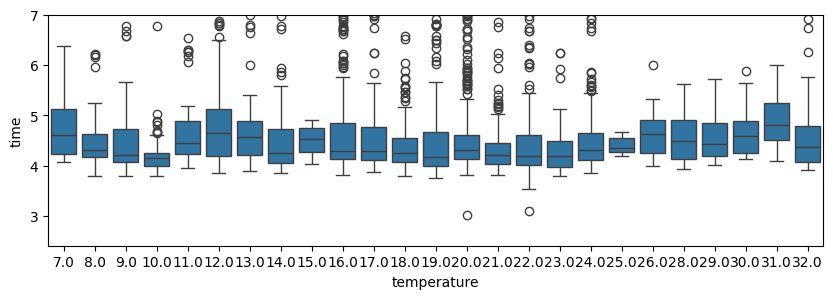

In [66]:
# Individual runtime as a function of temperature
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num, x=dog_perf_num['temperature'].round(0), y='time')
plt.ylim(top=7)

<Axes: xlabel='time', ylabel='Density'>

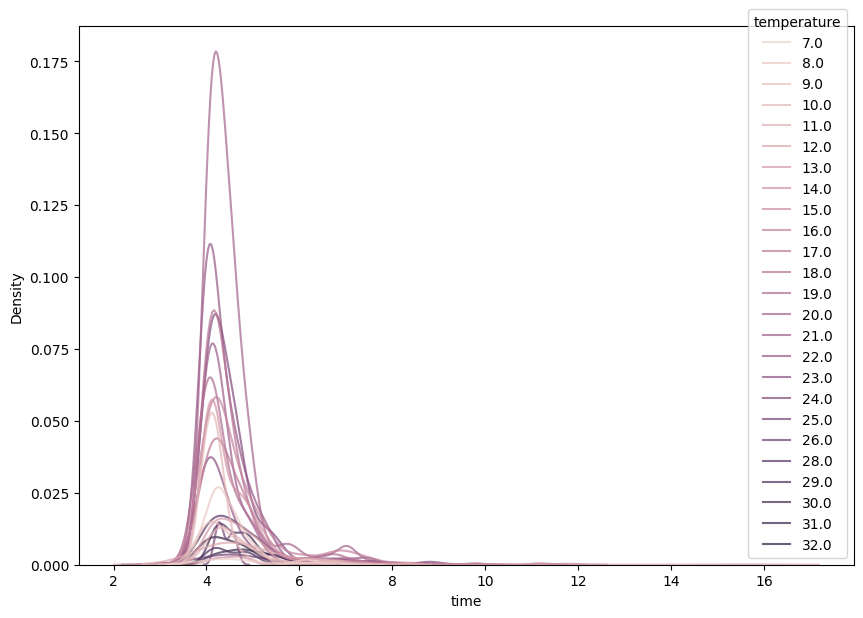

In [67]:
# Distribution of the individual runtimes according to the temperature
plt.figure(figsize=(10,7))
sns.kdeplot(data=dog_perf_num, x='time',hue=dog_perf_num['temperature'].round(0), alpha=0.7)

<Axes: xlabel='temperature'>

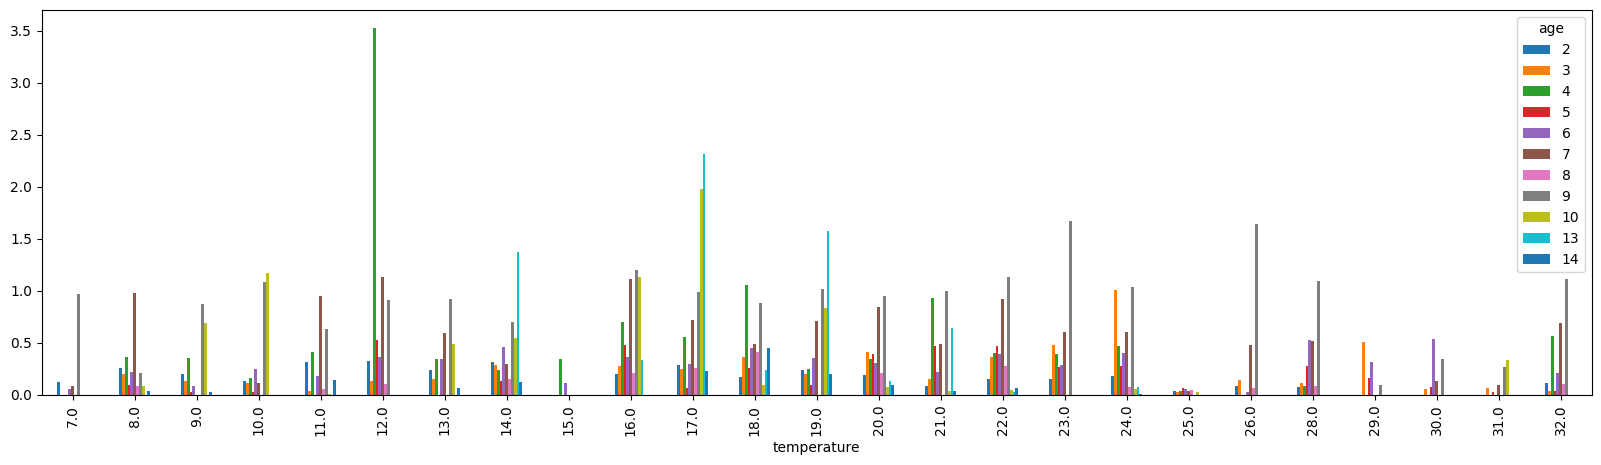

In [68]:
# Grouped by the age
dog_perf_num.groupby(by=[dog_perf_num['temperature'].round(0),'age'])['time'].std().unstack(1).plot(kind='bar',figsize=(20,5))

<Axes: xlabel='breed'>

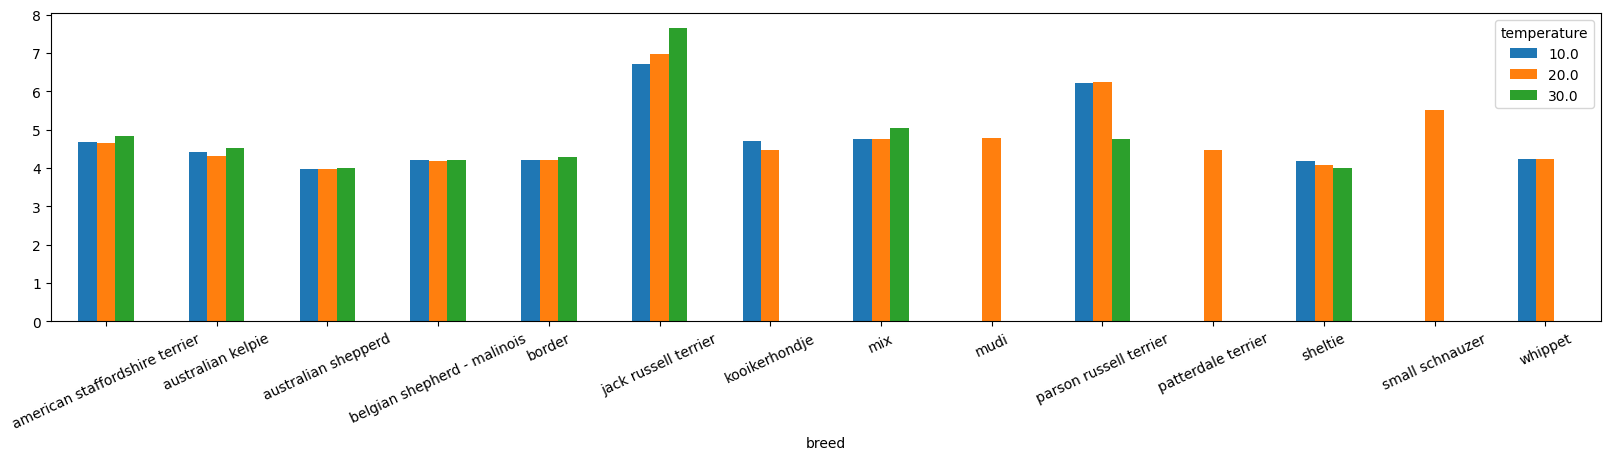

In [69]:
# Grouped by the breed
dog_perf_num.groupby(by=[dog_perf_num['temperature'].round(-1),'breed'])['time'].median().unstack(0).plot(kind='bar',figsize=(20,4), rot=25)

<Axes: xlabel='breed'>

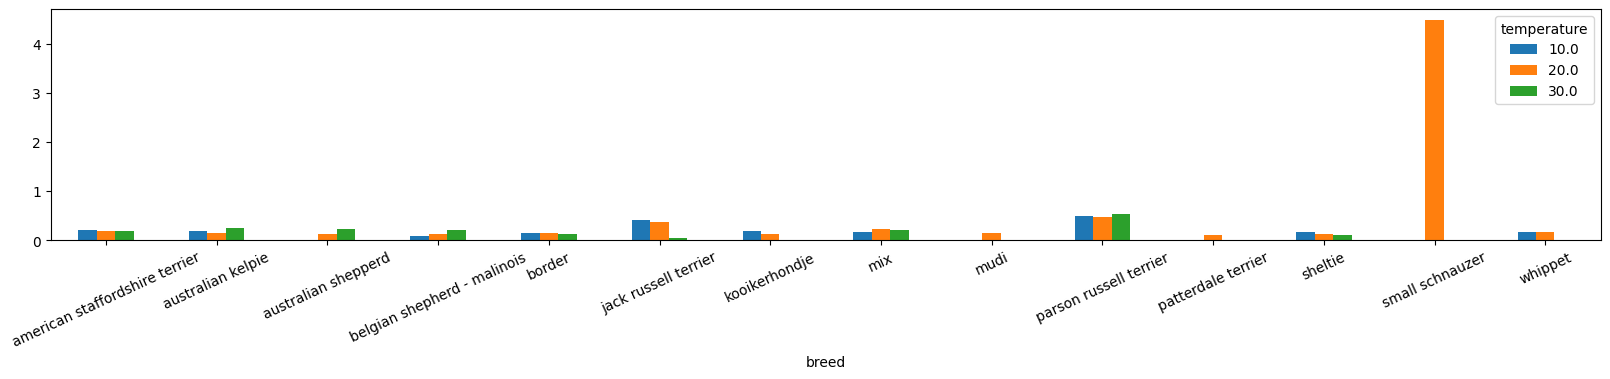

In [70]:
# Now check the change times instead of the runtimes
dog_perf_num.groupby(by=[dog_perf_num['temperature'].round(-1),'breed'])['chng'].median().unstack(0).plot(kind='bar',figsize=(20,3), rot=25)

<Axes: xlabel='temperature'>

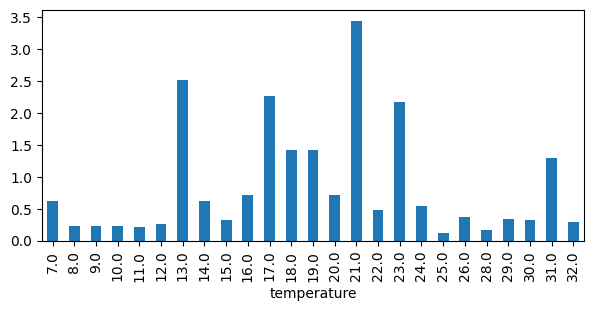

In [71]:
# Distribution of the change times according to the temperature
plt.figure(figsize=(7,3))
dog_perf_num.groupby(by=dog_perf_num['temperature'].round(0))['chng'].std().plot(kind='bar')

4.509853658536585
4.4765681031771
4.674596273291925


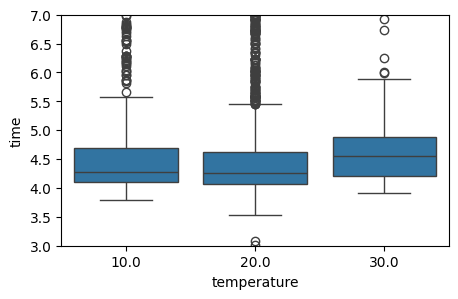

In [72]:
# Individual runtimes by temperature ranges
plt.figure(figsize=(5,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['temperature'].round(-1),y='time')
plt.ylim(bottom=3, top=7)

# Print the average values
print(dog_perf_num[dog_perf_num['temperature'].round(-1)==10]['time'].mean())
print(dog_perf_num[dog_perf_num['temperature'].round(-1)==20]['time'].mean())
print(dog_perf_num[dog_perf_num['temperature'].round(-1)==30]['time'].mean())

(-1.0, 2.0)

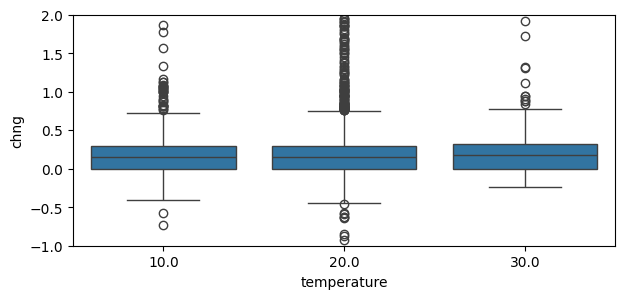

In [73]:
# Change times by temperature ranges
plt.figure(figsize=(7,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['temperature'].round(-1),y='chng')
plt.ylim(bottom=-1, top=2)

### Error ratio

<Axes: xlabel='temperature'>

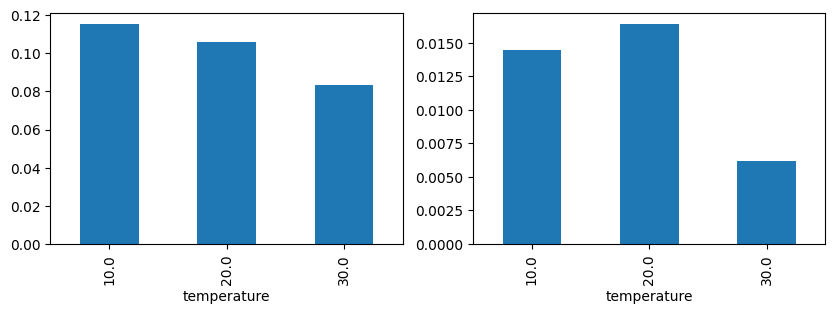

In [74]:
# Plot the change and run errors as a function of temperature ranges
plt.figure(figsize=(10,3))
plt.subplot(121)
((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ]['temperature'].round(-1).value_counts()) / dog_perf['temperature'].round(-1).value_counts()).sort_index().plot(kind='bar')
plt.subplot(122)
((dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ]['temperature'].round(-1).value_counts()) / dog_perf['temperature'].round(-1).value_counts()).sort_index().plot(kind='bar')


## Humidity

<Axes: xlabel='humidity', ylabel='Count'>

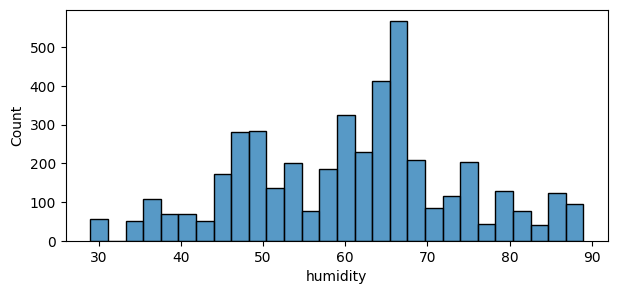

In [75]:
# Distribution of humidity data
plt.figure(figsize=(7,3))
sns.histplot(data=dog_perf_num, x='humidity')

<Axes: xlabel='humidity', ylabel='total time'>

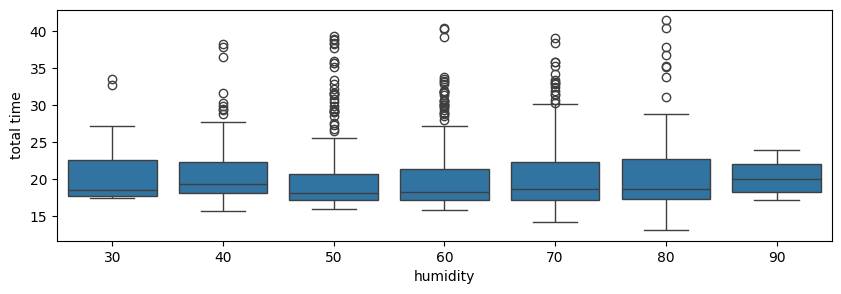

In [76]:
# Total team runtime as a function of humidity
plt.figure(figsize=(10,3))
sns.boxplot(data=df_onlywild_weather, x=df_onlywild_weather['humidity'].round(-1),y='total time')

<Axes: xlabel='total time', ylabel='Density'>

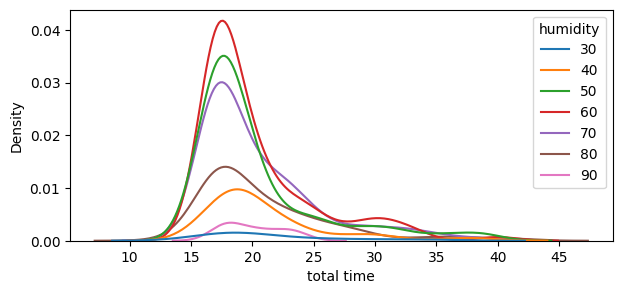

In [77]:
# Distribution of the total runtimes according to humidity ranges
plt.figure(figsize=(7,3))
sns.kdeplot(data=df_onlywild_weather,x='total time',hue=df_onlywild_weather['humidity'].round(-1),palette='tab10')

<Axes: xlabel='time', ylabel='Density'>

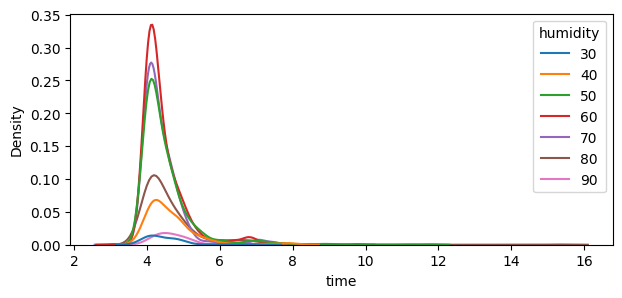

In [78]:
# Distribution of the individual runtimes according to humidity ranges
plt.figure(figsize=(7,3))
sns.kdeplot(data=dog_perf_num, x='time',hue=dog_perf_num['humidity'].round(-1),palette='tab10')

(-5.277429470333316, 6.0)

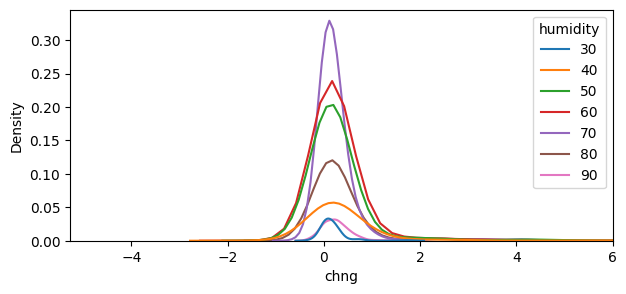

In [79]:
# Distribution of change times according to humidity ranges
plt.figure(figsize=(7,3))
sns.kdeplot(data=dog_perf_num,x='chng',hue=dog_perf_num['humidity'].round(-1),palette='tab10')
plt.xlim(right=6)

In [80]:
# Print the std of total runtime in each humidity range
for x in df_onlywild_weather['humidity'].round(-1).sort_values().unique():
    print(x, df_onlywild_weather[df_onlywild_weather['humidity'].round(-1) == x]['total time'].std())

30 5.2134526840558255
40 4.762637881856182
50 5.108730564048736
60 4.6559572328881655
70 4.764148074988313
80 5.259625497159505
90 2.3070358672447253


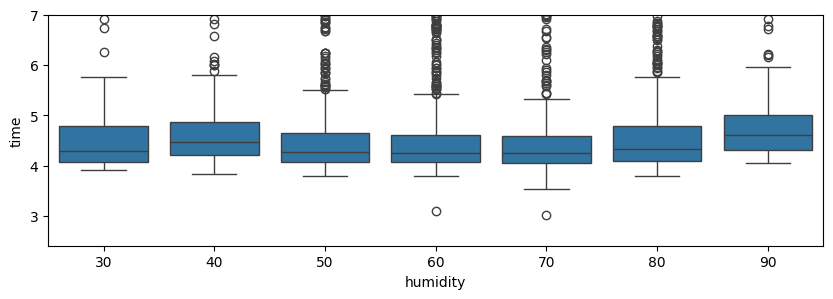

In [81]:
# Individual runtime as a function of humidity
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['humidity'].round(-1),y='time')
plt.ylim(top=7);

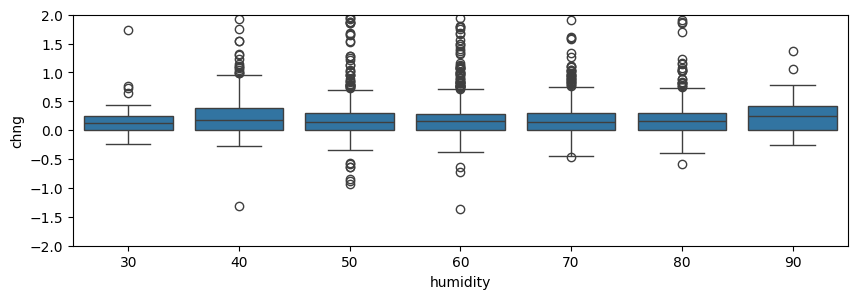

In [82]:
# Change time as a function of humidity
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['humidity'].round(-1),y='chng')
plt.ylim(bottom=-2, top=2);

<Axes: xlabel='age'>

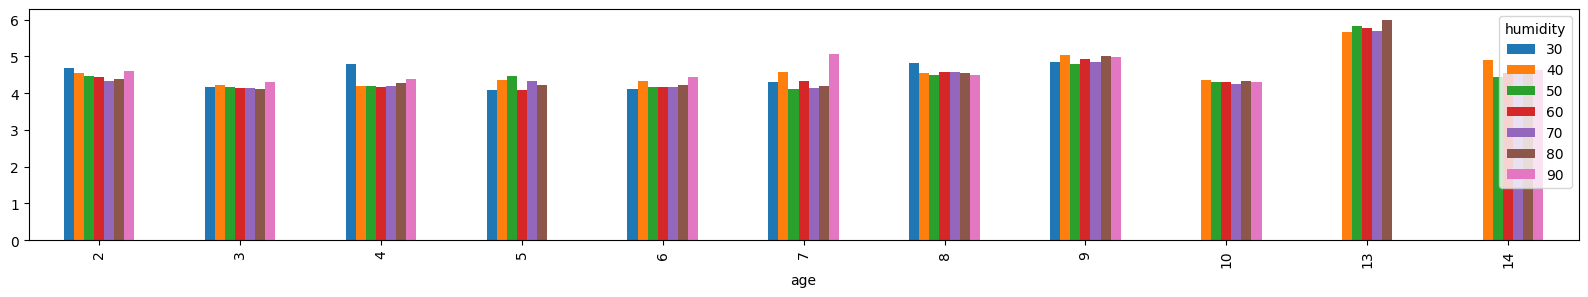

In [83]:
# Group by age and plot according to runtime
dog_perf_num.groupby(by=[dog_perf_num['humidity'].round(-1),'age'])['time'].median().unstack(0).plot(kind='bar',figsize=(20,3))

<Axes: xlabel='breed'>

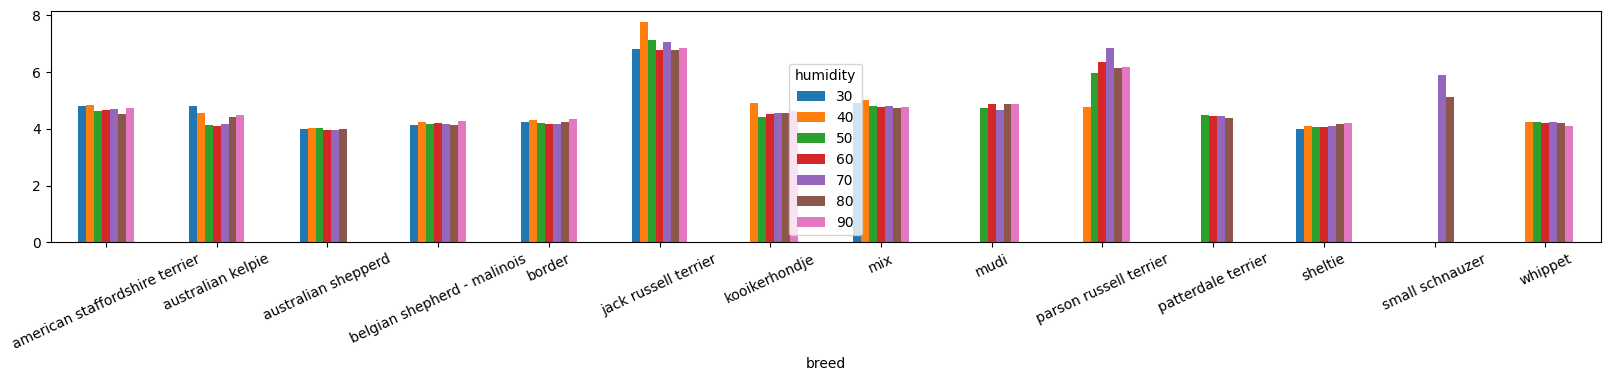

In [84]:
# Group by breed and plot according to runtime
dog_perf_num.groupby(by=[dog_perf_num['humidity'].round(-1),'breed'])['time'].median().unstack(0).plot(kind='bar',figsize=(20,3), rot=25)

<Axes: xlabel='breed'>

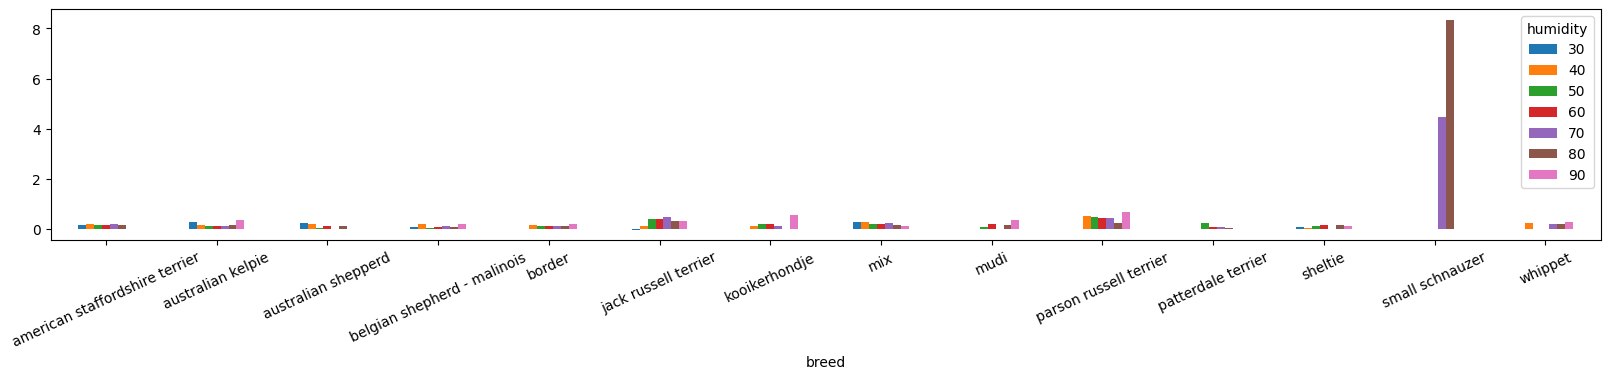

In [85]:
# Group by breed and plot according to change time
dog_perf_num.groupby(by=[dog_perf_num['humidity'].round(-1),'breed'])['chng'].median().unstack(0).plot(kind='bar',figsize=(20,3), rot=25)

<Axes: xlabel='humidity'>

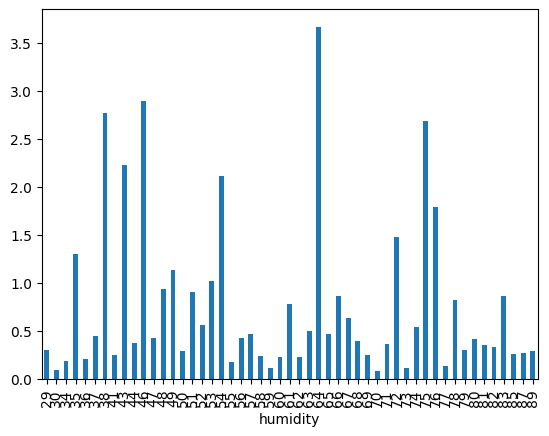

In [86]:
# Std of change times as a function of humidty
dog_perf_num.groupby(by=dog_perf_num['humidity'].round(0))['chng'].std().plot(kind='bar')

### Error ratio

<Axes: xlabel='humidity'>

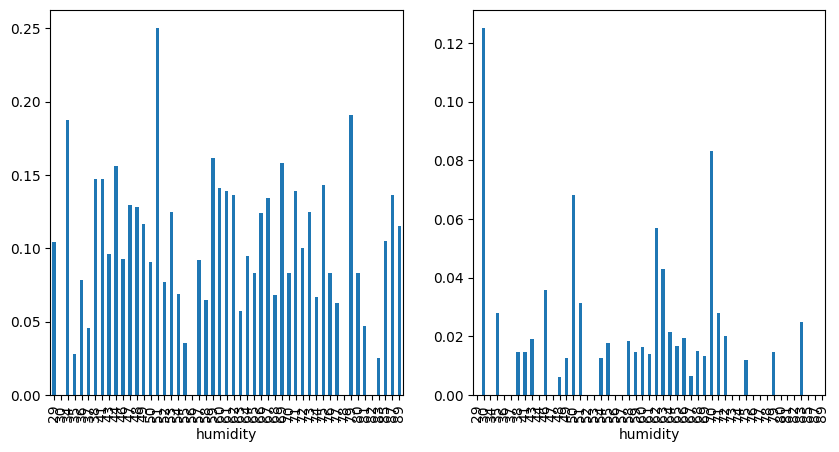

In [87]:
# Plot the change and running error ratio as a function of humidity
plt.figure(figsize=(10,5))
plt.subplot(121)
((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ]['humidity'].round(0).value_counts()) / dog_perf['humidity'].round(0).value_counts()).plot(kind='bar')
plt.subplot(122)
((dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ]['humidity'].round(0).value_counts()) / dog_perf['humidity'].round(0).value_counts()).plot(kind='bar')

## Effect of precipitation

In [88]:
# Data distribution
dog_perf_num['precipitation'].value_counts().sort_index()

precipitation
0.0    3816
0.1     244
0.2      76
0.3      92
0.4      32
0.5      40
0.7      36
1.0      12
1.5      12
2.2      28
Name: count, dtype: int64

<Axes: xlabel='precipitation', ylabel='total time'>

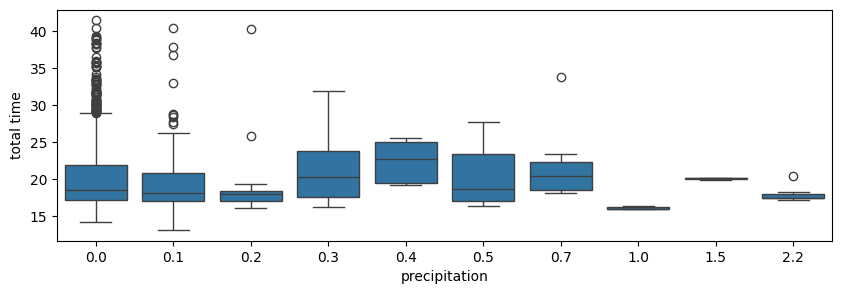

In [89]:
# Total team runtime as a function of precipitation
plt.figure(figsize=(10,3))
sns.boxplot(data=df_onlywild_weather, x='precipitation', y='total time')

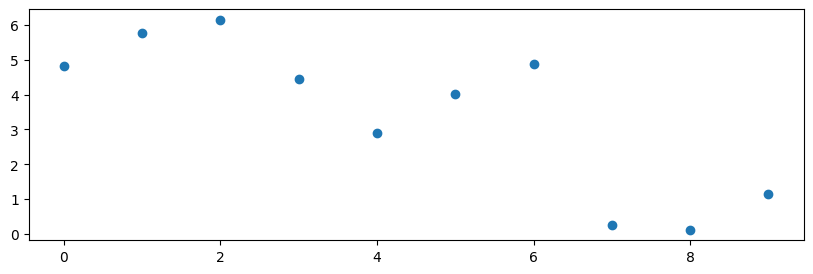

In [90]:
# Standard deviation of total team runtime as a function of precipitation
ans = []
for x in df_onlywild_weather['precipitation'].sort_values().unique():
    ans.append(df_onlywild_weather[df_onlywild_weather['precipitation'] == x]['total time'].std())

plt.figure(figsize=(10,3))
plt.plot(ans,'o')

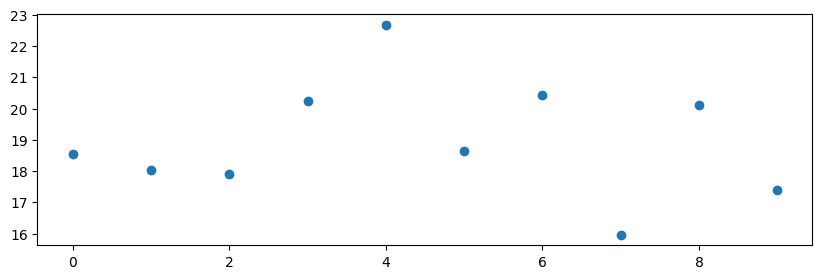

In [91]:
# Median value of total team runtime as a function of precipitation
ans = []
for x in df_onlywild_weather['precipitation'].sort_values().unique():
    ans.append(df_onlywild_weather[df_onlywild_weather['precipitation'] == x]['total time'].median())

plt.figure(figsize=(10,3))
plt.plot(ans,'o')

In [92]:
# Check the data for 0.7mm precipitation
df_onlywild_weather[df_onlywild_weather['precipitation'] == 0.7]

,who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,...,4.dog,when,location,track,championship,temperature,humidity,precipitation,wind_speed,wind_gusts
159,wildrunners maximini,18.03,L,25.0,Gerry,0.04,4.63,Riley,NaN,4.54,...,4.7,2023-05-06 09:26:17,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
160,wildrunners maximini,18.54,L,25.0,Gerry,0.16,outside,Riley,NaN,4.49,...,4.77,2023-05-06 09:27:33,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
161,wildrunners maximini,18.25,L,25.0,Riley,-0.04,4.4,Bree,error,4.15,...,4.54,2023-05-06 09:29:31,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
162,wildrunners xxl,23.32,L,15.0,Negro,-0.40,4.95,Gordon,0.65,6.78,...,5.23,2023-05-06 09:35:28,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
163,wildrunners xxl,22.25,L,15.0,Negro,-0.23,4.78,Gordon,0,6.55,...,5.28,2023-05-06 09:36:45,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
164,wildrunners xxl,33.77,L,15.0,Negro,-0.10,4.94,Gordon,0.23,6.87,...,15.32,2023-05-06 09:38:22,Žamberk,1,cz,11.9,79,0.7,9.0,27.0
165,wildrunners zephyr,21.74,W,25.0,Mason,0.07,4.45,Hank,0.58,5.46,...,5.19,2023-05-06 09:53:04,Žamberk,0,cz,11.9,79,0.7,9.0,27.0
166,wildrunners zephyr,20.43,L,25.0,Mason,0.09,4.42,Hank,0.58,4.92,...,5.13,2023-05-06 09:56:27,Žamberk,0,cz,11.9,79,0.7,9.0,27.0
167,wildrunners zephyr,19.80,L,25.0,Mason,0.04,4.47,Hank,0.47,4.87,...,5.11,2023-05-06 09:58:57,Žamberk,0,cz,11.9,79,0.7,9.0,27.0


<Axes: xlabel='precipitation', ylabel='time'>

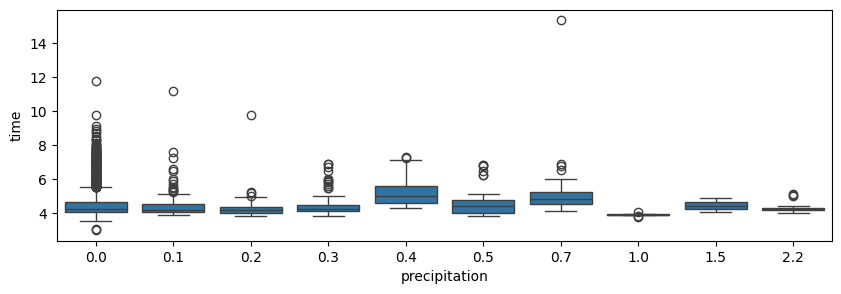

In [93]:
# Individual runtimes as a function of precipitation
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num, x=dog_perf_num['precipitation'], y='time')

(-3.734, 5.0)

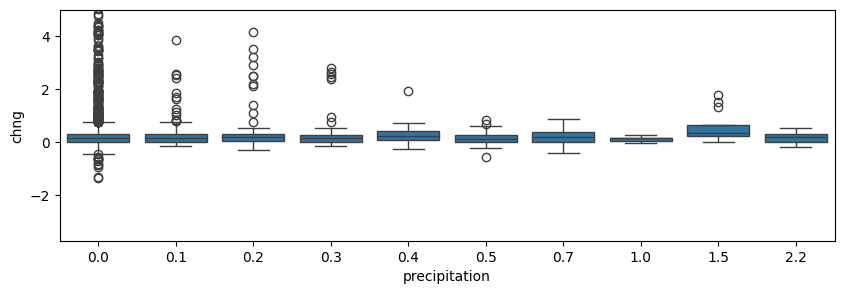

In [94]:
# Change times as a function of precipitation
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['precipitation'],y='chng')
plt.ylim(top=5)

(0.0, 0.1)

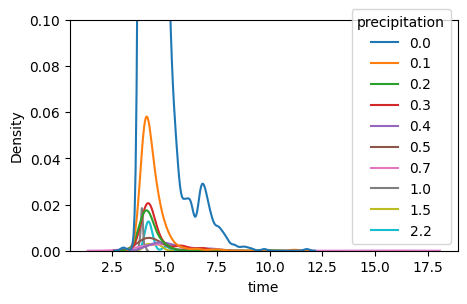

In [95]:
# Distribution of individual runtimes according to the precipitation
plt.figure(figsize=(5,3))
sns.kdeplot(data=dog_perf_num, x='time', hue='precipitation', palette='tab10')
plt.ylim(top=0.1)

(-11.269553610576198, 10.0)

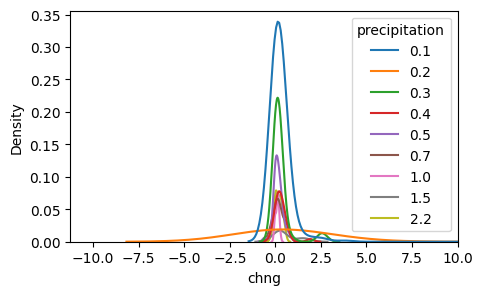

In [96]:
# Distribution of change times according to the precipitation
plt.figure(figsize=(5,3))
sns.kdeplot(data=dog_perf_num, x='chng', hue=dog_perf_num[dog_perf_num['precipitation'] > 0]['precipitation'], palette='tab10')
plt.xlim(right=10)

### Error ratio

<Axes: xlabel='precipitation'>

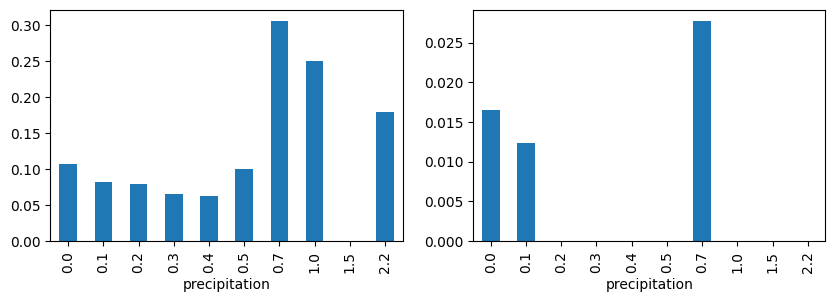

In [97]:
# Error ratio of change and running errors as a function of precipitation
plt.figure(figsize=(10,3))
plt.subplot(121)
((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ]['precipitation'].value_counts()) / dog_perf['precipitation'].value_counts()).plot(kind='bar')
plt.subplot(122)
((dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ]['precipitation'].value_counts()) / dog_perf['precipitation'].value_counts()).plot(kind='bar')

## Effect of wind speed

<Axes: ylabel='Frequency'>

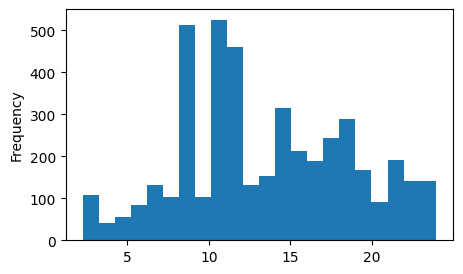

In [98]:
# Distribution of wind speed data
plt.figure(figsize=(5,3))
dog_perf_num['wind_speed'].plot(kind='hist',bins=22)

<Axes: ylabel='Frequency'>

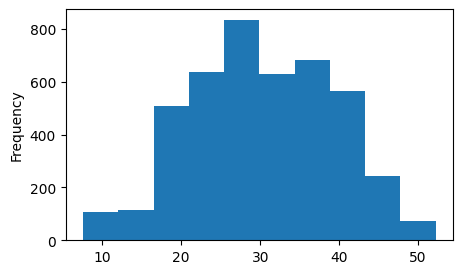

In [99]:
# Distribution of wind gusts data
plt.figure(figsize=(5,3))
dog_perf_num['wind_gusts'].plot(kind='hist')

<Axes: xlabel='wind_speed', ylabel='total time'>

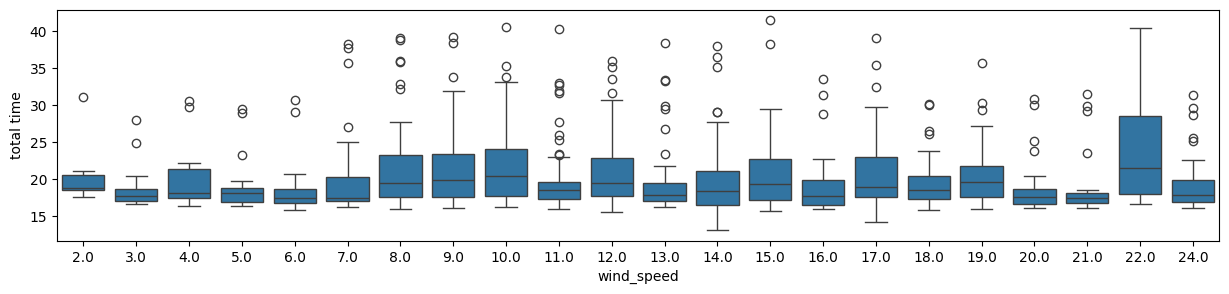

In [100]:
# Total team runtime as a function of wind speed
plt.figure(figsize=(15,3))
sns.boxplot(data=df_onlywild_weather, x=df_onlywild_weather['wind_speed'].round(0), y='total time')

<Axes: xlabel='wind_speed', ylabel='time'>

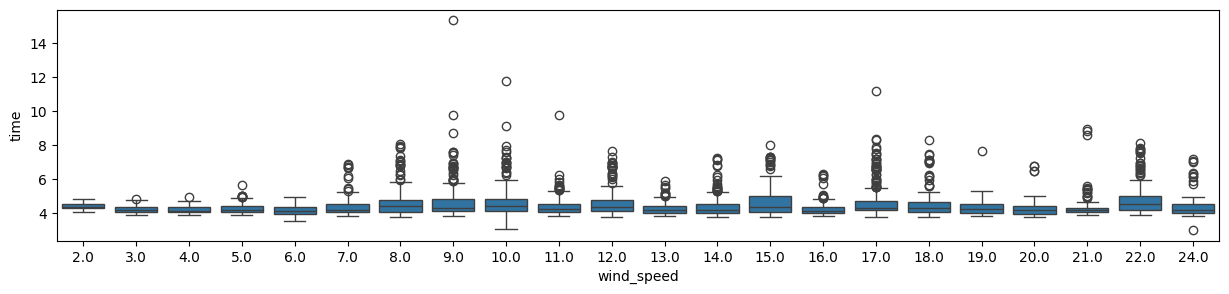

In [101]:
# Individual runtime as a function of wind speed
plt.figure(figsize=(15,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['wind_speed'].round(0),y='time')

(-3.734, 5.0)

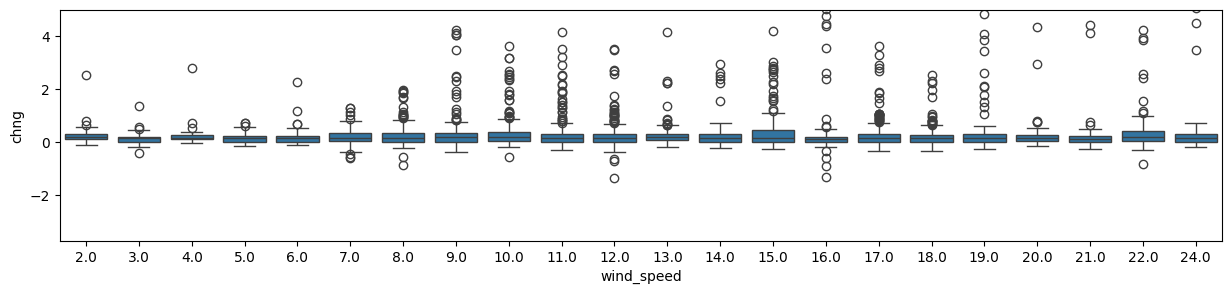

In [102]:
# Change time as a function of wind speed
plt.figure(figsize=(15,3))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['wind_speed'].round(0),y='chng')
plt.ylim(top=5)

(1.4987808529246398, 8.0)

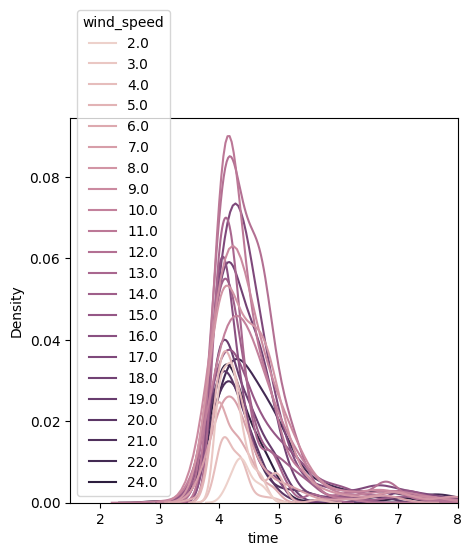

In [103]:
# Distribution of individual runtime according to different wind speed
plt.figure(figsize=(5,5))
sns.kdeplot(data=dog_perf_num, x='time', hue=dog_perf_num['wind_speed'].round(0))
plt.xlim(right=8)

(-5.883643024945881, 8.0)

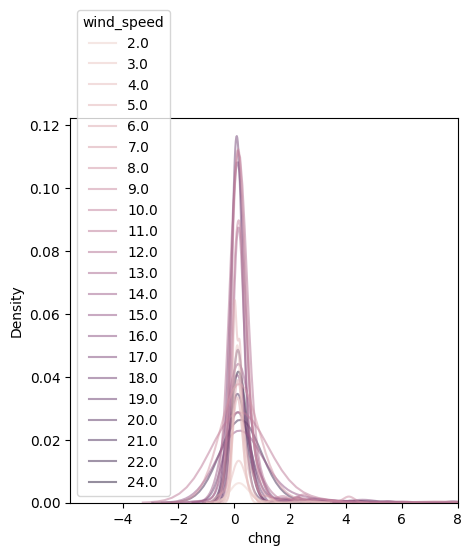

In [104]:
# Distribution of change time according to different wind speed
plt.figure(figsize=(5,5))
sns.kdeplot(data=dog_perf_num,x='chng',hue=dog_perf_num['wind_speed'].round(0),alpha=0.5)
plt.xlim(right=8)

<Axes: xlabel='wind_speed'>

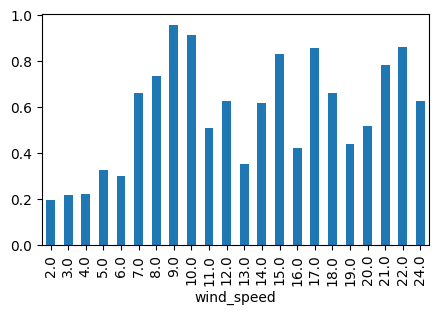

In [105]:
# Standard deviation of individual runtime according to wind speed
plt.figure(figsize=(5,3))
dog_perf_num.groupby(by=dog_perf_num['wind_speed'].round(0))['time'].std().plot(kind='bar')

<Axes: xlabel='wind_speed'>

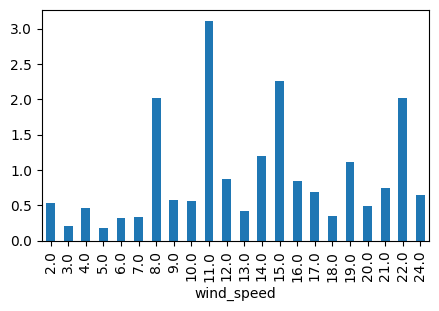

In [106]:
# Standard deviation of change time according to wind speed
plt.figure(figsize=(5,3))
dog_perf_num.groupby(by=dog_perf_num['wind_speed'].round(0))['chng'].std().plot(kind='bar')

<Axes: xlabel='wind_gusts', ylabel='time'>

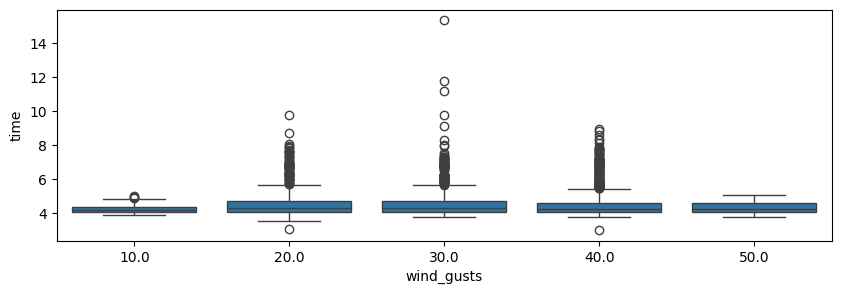

In [107]:
# Individual runtime as a function of wind gusts
plt.figure(figsize=(10,3))
sns.boxplot(data=dog_perf_num, x=dog_perf_num['wind_gusts'].round(-1), y='time')

(-3.734, 5.0)

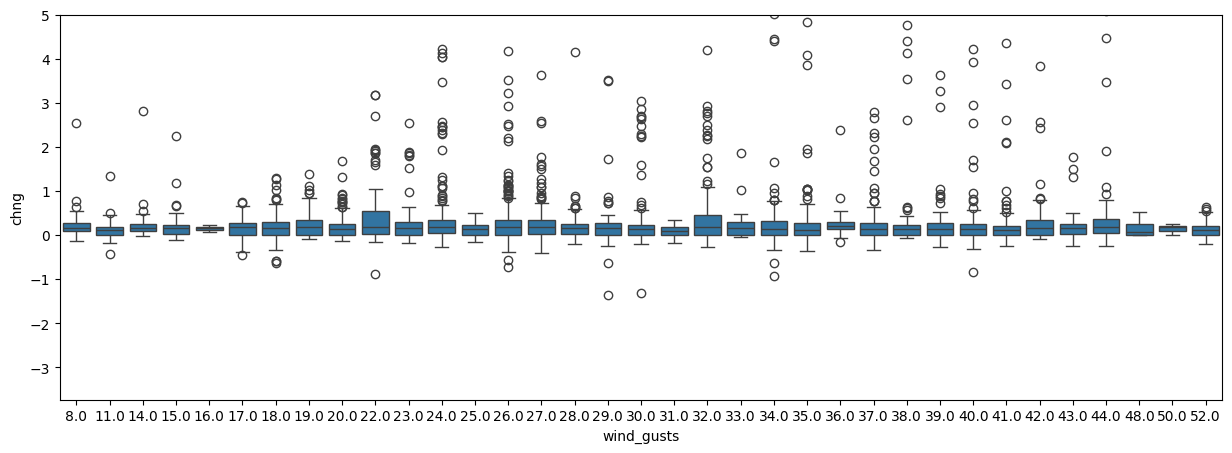

In [108]:
# Change time as a function of wind gusts
plt.figure(figsize=(15,5))
sns.boxplot(data=dog_perf_num,x=dog_perf_num['wind_gusts'].round(0),y='chng')
plt.ylim(top=5)

(1.8301710838338008, 8.0)

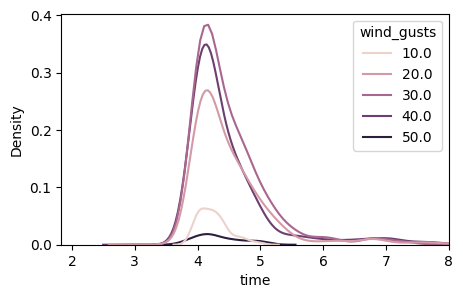

In [109]:
# Distribution of individual runtime according to wind gusts
plt.figure(figsize=(5,3))
sns.kdeplot(data=dog_perf_num, x='time', hue=dog_perf_num['wind_gusts'].round(-1))
plt.xlim(right=8)

(-5.100496951979048, 8.0)

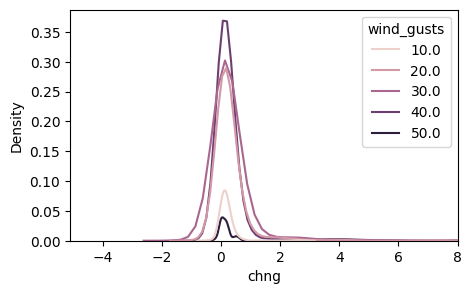

In [110]:
# Distribution of change time according to wind gusts
plt.figure(figsize=(5,3))
sns.kdeplot(data=dog_perf_num,x='chng',hue=dog_perf_num['wind_gusts'].round(-1))
plt.xlim(right=8)

<Axes: xlabel='wind_gusts'>

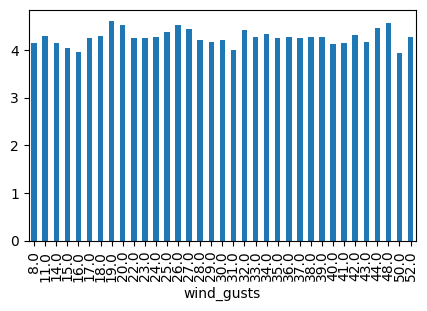

In [111]:
# Median value of individual runtime according to wind gusts
plt.figure(figsize=(5,3))
dog_perf_num.groupby(by=dog_perf_num['wind_gusts'].round(0))['time'].median().plot(kind='bar')

<Axes: xlabel='wind_gusts'>

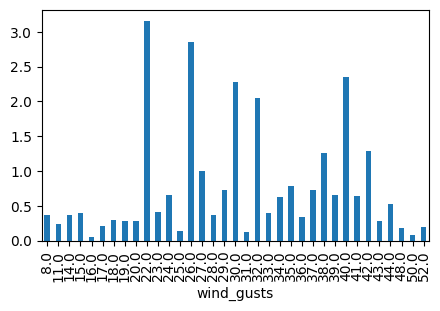

In [112]:
# Std of change time according to wind gusts
plt.figure(figsize=(5,3))
dog_perf_num.groupby(by=dog_perf_num['wind_gusts'].round(0))['chng'].std().plot(kind='bar')

### Error ratio

<Axes: xlabel='wind_speed'>

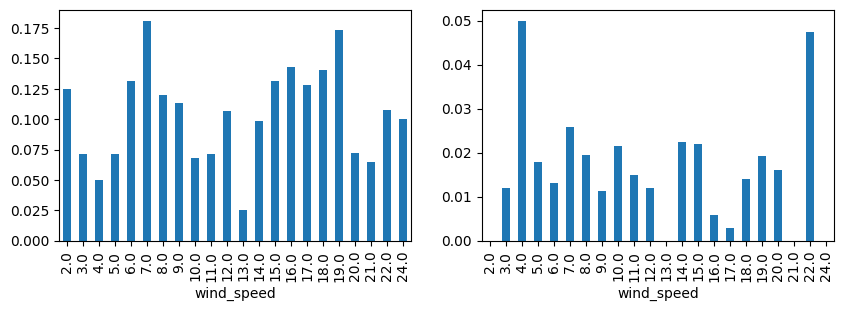

In [113]:
# Error ratio of change and running error for different wind speed
plt.figure(figsize=(10,3))
plt.subplot(121)
((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ]['wind_speed'].round(0).value_counts()) / dog_perf['wind_speed'].round(0).value_counts()).plot(kind='bar')
plt.subplot(122)
((dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ]['wind_speed'].round(0).value_counts()) / dog_perf['wind_speed'].round(0).value_counts()).plot(kind='bar')

<Axes: xlabel='wind_gusts'>

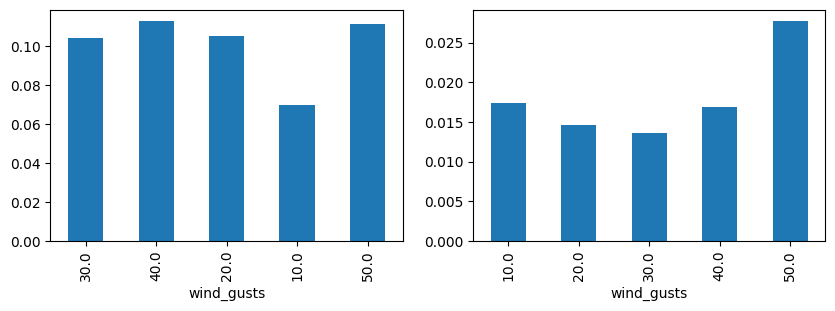

In [114]:
# Error ratio of change and running error for different wind gust
plt.figure(figsize=(10,3))
plt.subplot(121)
((dog_perf[(dog_perf['chng']=='error') | (dog_perf['chng'].astype(str).str.contains('-')) ]['wind_gusts'].round(-1).value_counts()) / dog_perf['wind_gusts'].round(-1).value_counts()).plot(kind='bar')
plt.subplot(122)
((dog_perf[(dog_perf['time']=='ran in') | (dog_perf['time']=='outside') ]['wind_gusts'].round(-1).value_counts()) / dog_perf['wind_gusts'].round(-1).value_counts()).plot(kind='bar')

In [115]:
# Distribution of wind gusts data
dog_perf_num['wind_gusts'].round(-1).value_counts()

wind_gusts
30.0    1620
40.0    1364
20.0    1160
10.0     172
50.0      72
Name: count, dtype: int64

# Export the weather table

In [116]:
dog_perf.to_csv('./../data/cleaned/race_data_with_weather.csv',index=False)

-----

-----


# Examine the variable importances with machine learning model

In [117]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import shap # for variable importance matric

## Total team runtime

In [118]:
df_onlywild_weather.columns

Index(['who', 'total time', 'W/L/T', 'Hurdles', 'name', 'start', '1.dog',
       'name.1', 'chng', '2.dog', 'name.2', 'chng.1', '3.dog', 'name.3',
       'chng.2', '4.dog', 'when', 'location', 'track', 'championship',
       'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_gusts'],
      dtype='object')

In [119]:
df_onlywild_weather[['total time', 'Hurdles', 'name', 'name.1', 'name.2', 'name.3', 'when', 'location', 'track', 'championship', 'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_gusts']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   total time     1073 non-null   float64       
 1   Hurdles        1097 non-null   float64       
 2   name           1097 non-null   object        
 3   name.1         1097 non-null   object        
 4   name.2         1097 non-null   object        
 5   name.3         1097 non-null   object        
 6   when           1097 non-null   datetime64[ns]
 7   location       1097 non-null   object        
 8   track          1097 non-null   int64         
 9   championship   1097 non-null   object        
 10  temperature    1097 non-null   float64       
 11  humidity       1097 non-null   int64         
 12  precipitation  1097 non-null   float64       
 13  wind_speed     1097 non-null   float64       
 14  wind_gusts     1097 non-null   float64       
dtypes: datetime64[ns](1),

In [120]:
# Create dummy variables for categorical columns
df_onlywild_weather_nums = df_onlywild_weather[['total time', 'Hurdles', 'name', 'name.1', 'name.2', 'name.3', 'location', 'track', 'championship', 'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_gusts']].select_dtypes(exclude='object')
df_onlywild_weather_objs =  df_onlywild_weather[['total time', 'Hurdles', 'name', 'name.1', 'name.2', 'name.3', 'location', 'track', 'championship', 'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_gusts']].select_dtypes(include='object')

df_onlywild_weather_objs = pd.get_dummies(df_onlywild_weather_objs,drop_first=True)

df_onlywild_weather_encoded = pd.concat([df_onlywild_weather_nums,df_onlywild_weather_objs],axis=1)
df_onlywild_weather_encoded # Check the One-hot encoding

,total time,Hurdles,track,temperature,humidity,precipitation,wind_speed,wind_gusts,name_Angie,name_Bailey,...,name.3_Tyna,location_Heroltice,location_Litomyšl,location_Louňovice,location_Nové Město pod Smrkem,location_Prostějov,location_Tapioszentmarton,location_Vodňany,location_Žamberk,championship_efc
0,17.01,25.0,0,15.6,49,0.0,7.1,18.0,False,False,...,False,True,False,False,False,False,False,False,False,False
1,19.43,25.0,1,15.6,49,0.0,7.1,18.0,False,False,...,False,True,False,False,False,False,False,False,False,False
2,17.42,25.0,0,15.6,49,0.0,7.1,18.0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,18.59,25.0,1,15.6,49,0.0,7.1,18.0,False,False,...,False,True,False,False,False,False,False,False,False,False
4,16.73,25.0,0,15.6,49,0.0,7.1,18.0,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,16.15,27.5,0,9.5,60,0.0,18.8,40.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1093,17.07,27.5,1,9.2,58,0.1,21.9,42.8,False,False,...,False,False,False,False,False,False,False,True,False,False
1094,17.06,27.5,1,9.2,58,0.1,21.9,42.8,False,False,...,False,False,False,False,False,False,False,True,False,False
1095,16.97,27.5,1,9.2,58,0.1,21.9,42.8,False,False,...,False,False,False,False,False,False,False,True,False,False


In [121]:
print(df_onlywild_weather_encoded.columns.tolist())

['total time', 'Hurdles', 'track', 'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_gusts', 'name_Angie', 'name_Bailey', 'name_Bonnie', 'name_Bree', 'name_Brix', 'name_Brooke', 'name_Cookies', 'name_Dexter', 'name_Dixie', 'name_Dusty', 'name_Easy', 'name_Enola', 'name_Falco', 'name_Fleur', 'name_Gerry', 'name_Gordon', 'name_Hank', 'name_Jasper', 'name_Jessie', 'name_Kent', 'name_Maggie', 'name_Mason', 'name_Negro', 'name_Nina', 'name_Pax', 'name_Rex', 'name_Riley', 'name_Rocky', 'name_Scotty', 'name_Sirius', 'name_Sunny', 'name.1_Alex', 'name.1_Alfie', 'name.1_Angie', 'name.1_Apollo', 'name.1_Bella', 'name.1_Bonnie', 'name.1_Bree', 'name.1_Brooke', 'name.1_Bruno', 'name.1_Dexter', 'name.1_Dixie', 'name.1_Dusty', 'name.1_Enola', 'name.1_Falco', 'name.1_Fleur', 'name.1_Gerry', 'name.1_Gordon', 'name.1_Hank', 'name.1_Hector', 'name.1_Jasper', 'name.1_Maggie', 'name.1_Mason', 'name.1_Moon', 'name.1_Negro', 'name.1_Nina', 'name.1_Pax', 'name.1_Rex', 'name.1_Riley', 'name.1_Ro

In [122]:
# Create a regression model with random forest
X= df_onlywild_weather_encoded[df_onlywild_weather_encoded['total time'].isna() == 0][['Hurdles', 'track', 'temperature', 
                                                                   'humidity', 'precipitation', 'wind_speed', 'wind_gusts', 'name_Angie', 'name_Bailey', 
                                                                   'name_Bonnie', 'name_Bree', 'name_Brix', 'name_Brooke', 'name_Cookies', 'name_Dexter', 'name_Dixie', 
                                                                   'name_Dusty', 'name_Easy', 'name_Enola', 'name_Falco', 'name_Fleur', 'name_Gerry', 'name_Gordon', 
                                                                   'name_Hank', 'name_Jasper', 'name_Jessie', 'name_Kent', 'name_Maggie', 'name_Mason', 'name_Negro', 
                                                                   'name_Nina', 'name_Pax', 'name_Rex', 'name_Riley', 'name_Rocky', 'name_Scotty', 'name_Sirius', 'name_Sunny', 
                                                                   'name.1_Alex', 'name.1_Alfie', 'name.1_Angie', 'name.1_Apollo', 'name.1_Bella', 'name.1_Bonnie', 'name.1_Bree', 
                                                                   'name.1_Brooke', 'name.1_Bruno', 'name.1_Dexter', 'name.1_Dixie', 'name.1_Dusty', 'name.1_Enola', 
                                                                   'name.1_Falco', 'name.1_Fleur', 'name.1_Gerry', 'name.1_Gordon', 'name.1_Hank', 'name.1_Hector', 
                                                                   'name.1_Jasper', 'name.1_Maggie', 'name.1_Mason', 'name.1_Moon', 'name.1_Negro', 'name.1_Nina', 'name.1_Pax', 
                                                                   'name.1_Rex', 'name.1_Riley', 'name.1_Rocky', 'name.1_Sara', 'name.1_Scotty', 'name.1_Sirius', 'name.1_Them', 
                                                                   'name.1_Tyna', 'name.2_Agnes', 'name.2_Alex', 'name.2_Alfie', 'name.2_Angie', 'name.2_Bailey', 'name.2_Bella', 
                                                                   'name.2_Bonnie', 'name.2_Bree', 'name.2_Bruno', 'name.2_Dixie', 'name.2_Dusty', 'name.2_Falco', 'name.2_Fleur', 
                                                                   'name.2_Gerry', 'name.2_Gordon', 'name.2_Hank', 'name.2_Hector', 'name.2_Henry', 'name.2_Jasper', 
                                                                   'name.2_Kesha', 'name.2_Maggie', 'name.2_Mason', 'name.2_Milo', 'name.2_Moon', 'name.2_Negro', 'name.2_Pax', 
                                                                   'name.2_Rex', 'name.2_Rocky', 'name.2_Sara', 'name.2_Scotty', 'name.2_Sirius', 'name.2_Ted', 'name.2_Tyna', 
                                                                   'name.3_Agnes', 'name.3_Alex', 'name.3_Alfie', 'name.3_Angie', 'name.3_Ashley', 'name.3_Bailey', 'name.3_Bella', 
                                                                   'name.3_Bree', 'name.3_Brooke', 'name.3_Bruno', 'name.3_Cookies', 'name.3_Dixie', 'name.3_Dusty', 'name.3_Falco', 
                                                                   'name.3_Fleur', 'name.3_Gerry', 'name.3_Gordon', 'name.3_Hank', 'name.3_Hector', 'name.3_Kent', 'name.3_Kesha', 
                                                                   'name.3_Maggie', 'name.3_Mason', 'name.3_Milo', 'name.3_Moon', 'name.3_Negro', 'name.3_Pax', 'name.3_Punk', 
                                                                   'name.3_Rex', 'name.3_Sara', 'name.3_Scotty', 'name.3_Sirius', 'name.3_Speedy', 'name.3_Ted', 'name.3_Tyna', 
                                                                   'location_Heroltice', 'location_Litomyšl', 'location_Louňovice', 'location_Nové Město pod Smrkem', 
                                                                   'location_Prostějov', 'location_Tapioszentmarton', 'location_Vodňany', 'location_Žamberk', 'championship_efc']].copy()

y = df_onlywild_weather_encoded['total time'].dropna().copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(max_depth=5, random_state=101)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=101)

In [123]:
# Check the accuracy of the model
MAE = mean_absolute_error(y_test,model.predict(X_test))
MSE = mean_squared_error(y_test,model.predict(X_test))
RMSE = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print(MAE)
print(MSE)
print(RMSE)

2.6189907927038973
14.005334705605613
3.742370198898769


In [124]:
# Average of the total run times to compare the error of the model
df_onlywild_weather['total time'].mean()

20.38821994408201

-> The model is not sufficiently accurate

In [125]:
# However, I will check the importance of each variable in teaching the model
# I use the SHAP library to calculate the importance of each variable in the regression model
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

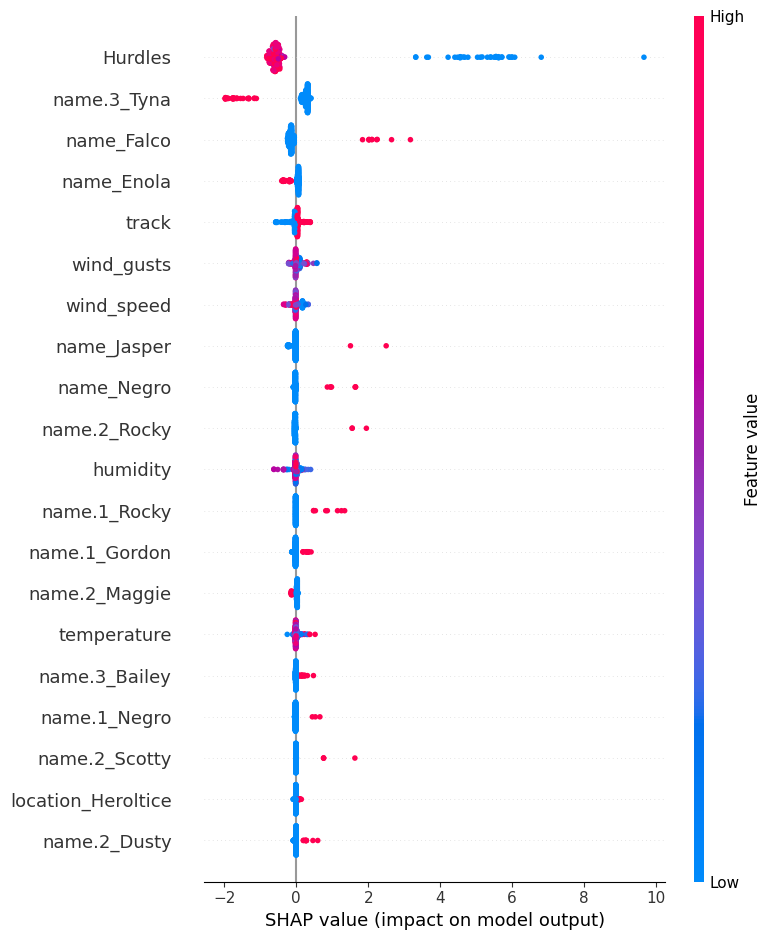

In [126]:
# Plot the 20 most important variables and its SHAP values
shap.summary_plot(shap_values, X_test, max_display=20)

## Individual runtimes

In [127]:
# Create dummy variables for categorical columns
dog_perf_num_nums = dog_perf_num.select_dtypes(exclude='object')
dog_perf_num_objs =  dog_perf_num.select_dtypes(include='object')

dog_perf_num_objs = pd.get_dummies(dog_perf_num_objs,drop_first=True)

dog_perf_num_encoded = pd.concat([dog_perf_num_nums,dog_perf_num_objs],axis=1)
dog_perf_num_encoded

,chng,time,track,temperature,humidity,precipitation,wind_speed,wind_gusts,hurdle_height,age,...,sex_male,castrated_sexual,location_Heroltice,location_Litomyšl,location_Louňovice,location_Nové Město pod Smrkem,location_Prostějov,location_Tapioszentmarton,location_Vodňany,location_Žamberk
0,-0.24,4.21,0,15.6,49,0.0,7.1,18.0,25.0,4,...,False,False,True,False,False,False,False,False,False,False
1,-0.11,4.08,1,15.6,49,0.0,7.1,18.0,25.0,3,...,True,True,True,False,False,False,False,False,False,False
2,0.02,4.25,0,15.6,49,0.0,7.1,18.0,25.0,4,...,False,False,True,False,False,False,False,False,False,False
3,-0.63,4.25,1,15.6,49,0.0,7.1,18.0,25.0,3,...,True,True,True,False,False,False,False,False,False,False
4,-0.06,4.21,0,15.6,49,0.0,7.1,18.0,25.0,4,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,NaN,4.01,0,9.5,60,0.0,18.8,40.0,27.5,6,...,False,False,False,False,False,False,False,False,True,False
4384,0.00,4.22,1,9.2,58,0.1,21.9,42.8,27.5,10,...,True,False,False,False,False,False,False,False,True,False
4385,0.18,4.16,1,9.2,58,0.1,21.9,42.8,27.5,10,...,True,False,False,False,False,False,False,False,True,False
4386,NaN,4.17,1,9.2,58,0.1,21.9,42.8,27.5,10,...,True,False,False,False,False,False,False,False,True,False


In [128]:
# Print the variable names
dog_perf_num_encoded.columns

Index(['chng', 'time', 'track', 'temperature', 'humidity', 'precipitation',
       'wind_speed', 'wind_gusts', 'hurdle_height', 'age', 'name_Agnes',
       'name_Alex', 'name_Alfie', 'name_Angie', 'name_Apollo', 'name_Ashley',
       'name_Bailey', 'name_Bella', 'name_Bonnie', 'name_Bree', 'name_Brix',
       'name_Brooke', 'name_Bruno', 'name_Cookies', 'name_Dexter',
       'name_Dixie', 'name_Dusty', 'name_Easy', 'name_Enola', 'name_Falco',
       'name_Fleur', 'name_Gerry', 'name_Gordon', 'name_Hank', 'name_Hector',
       'name_Henry', 'name_Jasper', 'name_Jessie', 'name_Kent', 'name_Kesha',
       'name_Maggie', 'name_Mason', 'name_Milo', 'name_Moon', 'name_Negro',
       'name_Nina', 'name_Pax', 'name_Punk', 'name_Rex', 'name_Riley',
       'name_Rocky', 'name_Sara', 'name_Scotty', 'name_Sirius', 'name_Speedy',
       'name_Sunny', 'name_Ted', 'name_Them', 'name_Tyna',
       'breed_australian kelpie', 'breed_australian shepperd',
       'breed_belgian shepherd - malinois', 'bree

In [132]:
# Create a new regression model with random forest for the prediction of individual runtimes
X= dog_perf_num_encoded[dog_perf_num_encoded['time'].isna() == 0][['track', 'temperature', 'humidity', 'precipitation',
       'wind_speed', 'wind_gusts', 'hurdle_height', 'age',
       'name_Agnes',
       'name_Alex', 'name_Alfie', 'name_Angie', 'name_Apollo', 'name_Ashley',
       'name_Bailey', 'name_Bella', 'name_Bonnie', 'name_Bree', 'name_Brix',
       'name_Brooke', 'name_Bruno', 'name_Cookies', 'name_Dexter',
       'name_Dixie', 'name_Dusty', 'name_Easy', 'name_Enola', 'name_Falco',
       'name_Fleur', 'name_Gerry', 'name_Gordon', 'name_Hank', 'name_Hector',
       'name_Henry', 'name_Jasper', 'name_Jessie', 'name_Kent', 'name_Kesha',
       'name_Maggie', 'name_Mason', 'name_Milo', 'name_Moon', 'name_Negro',
       'name_Nina', 'name_Pax', 'name_Punk', 'name_Rex', 'name_Riley',
       'name_Rocky', 'name_Sara', 'name_Scotty', 'name_Sirius', 'name_Speedy',
       'name_Sunny', 'name_Ted', 'name_Them', 'name_Tyna',
       'breed_australian kelpie', 'breed_australian shepperd',
       'breed_belgian shepherd - malinois', 'breed_border',
       'breed_jack russell terrier', 'breed_mix', 'breed_kooikerhondje',
       'breed_mudi', 'breed_parson russell terrier',
       'breed_patterdale terrier', 'breed_sheltie', 'breed_small schnauzer',
       'breed_whippet',
       'championship_efc', 'sex_male', 'castrated_sexual']].copy()

y = dog_perf_num_encoded['time'].dropna().copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(max_depth=5, random_state=101)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=101)

In [133]:
# Check the accuracy of the model
MAE = mean_absolute_error(y_test,model.predict(X_test))
MSE = mean_squared_error(y_test,model.predict(X_test))
RMSE = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

print(MAE)
print(MSE)
print(RMSE)

0.24993913681035002
0.17371542517768335
0.41679182474909865


In [134]:
dog_perf_num['time'].mean()

4.497641749595002

In [135]:
MSE/(dog_perf_num['time'].mean())   # The error of the model is about 4%, which is appropriate, making the importance of the variables relevant

0.038623668768933375

<Axes: xlabel='residual', ylabel='Density'>

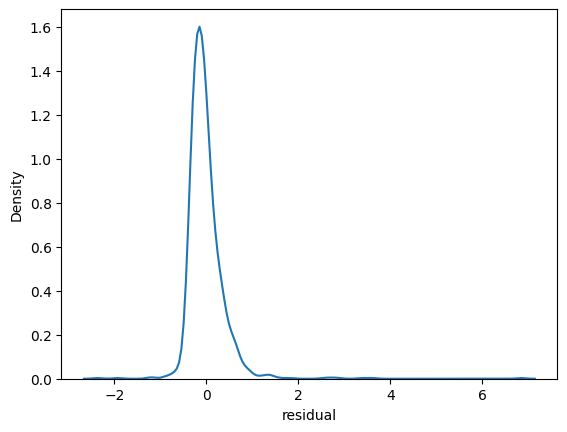

In [136]:
# The model has proved to be sufficiently accurate, so I'll go ahead and check the distribution of the error of the difference between the estimated and actual values to see if it follows a normal distribution
quartet = pd.DataFrame()
quartet['residual'] = y_test - model.predict(X_test)
sns.kdeplot(quartet['residual'])

In [137]:
# I use the SHAP library to calculate the importance of each variable in the regression model
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

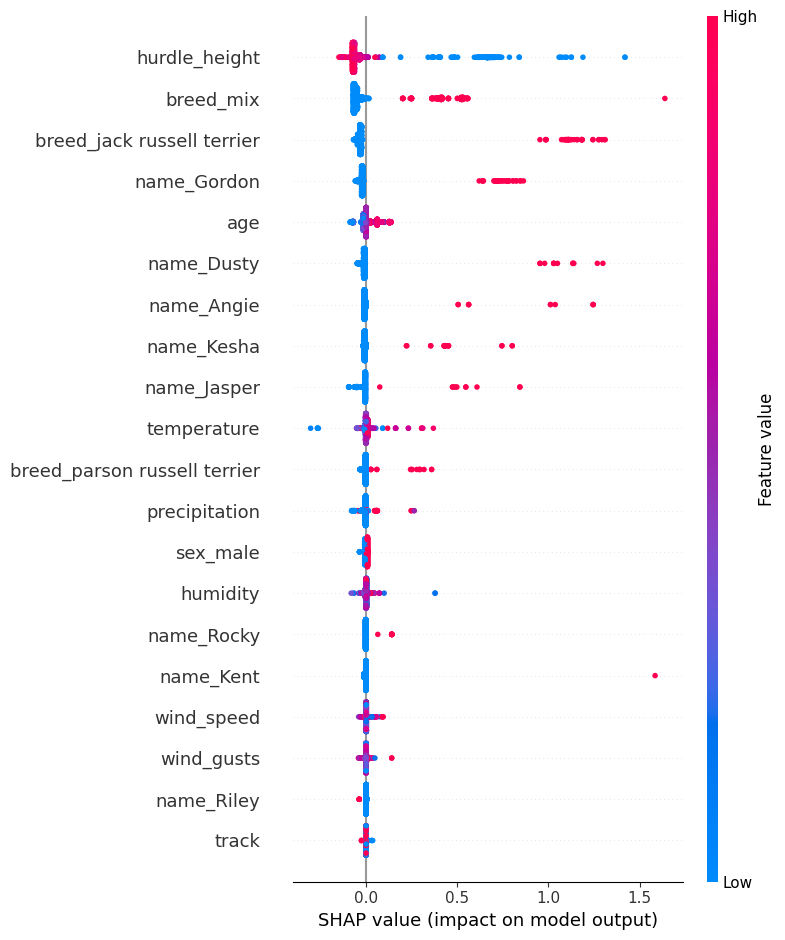

In [138]:
# Plot the 20 most important variables
shap.summary_plot(shap_values, X_test, max_display=20)

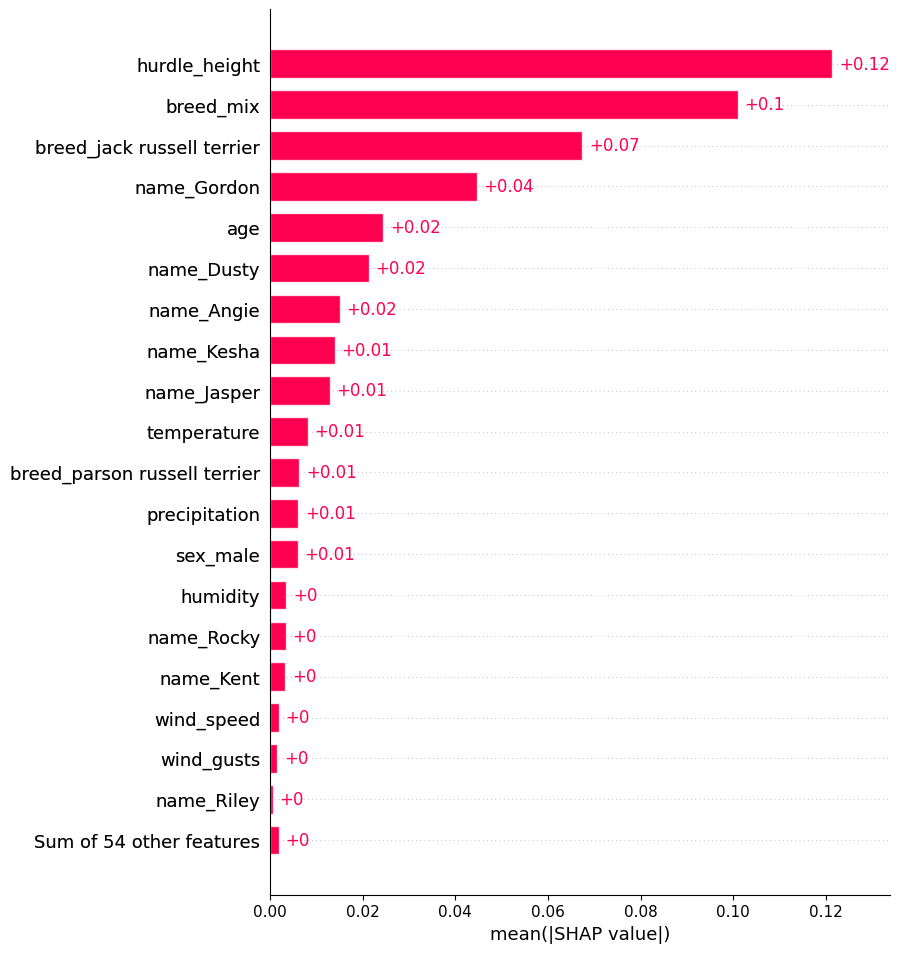

In [139]:
# Absolute value of the variance of the top 20 variables, bar chart
shap.plots.bar(explainer(X_test), max_display=20)

In [140]:
# Display variable importance values in a separate table
importances = []
for i in range(shap_values.shape[1]):
    importances.append(np.mean(np.abs(shap_values[:, i])))
    
imp = pd.DataFrame(data = {'variables': X_test.columns, 'importances': importances})
imp.sort_values(by='importances', ascending=False)

,variables,importances
6,hurdle_height,0.121411
62,breed_mix,0.100977
61,breed_jack russell terrier,0.067469
30,name_Gordon,0.044590
7,age,0.024448
...,...,...
44,name_Pax,0.000000
21,name_Cookies,0.000000
14,name_Bailey,0.000000
19,name_Brooke,0.000000


In [141]:
# Merge rows related to name and breed
imp_filtered = imp.copy()
imp_filtered.drop(index = imp_filtered[imp_filtered['variables'].str.contains('breed|name')].index, inplace=True)
imp_filtered = pd.concat([imp_filtered, pd.DataFrame(data={'variables': ['name'], 'importances': [imp[imp['variables'].str.contains('name')]['importances'].mean()]})], ignore_index=True)
imp_filtered = pd.concat([imp_filtered, pd.DataFrame(data={'variables': ['breed'], 'importances': [imp[imp['variables'].str.contains('breed')]['importances'].mean()]})], ignore_index=True)

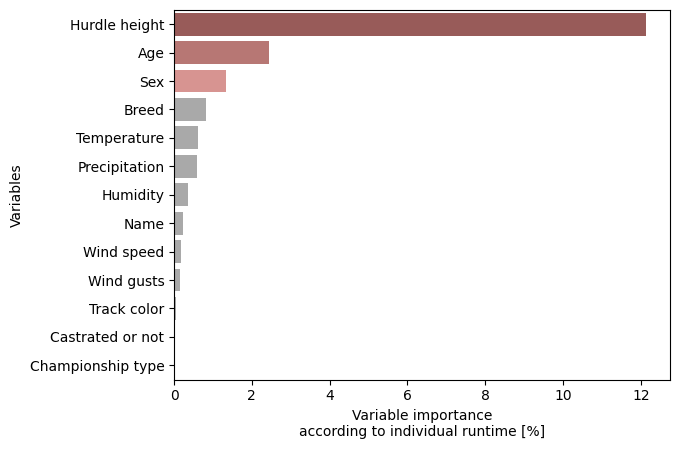

In [142]:
# Plot
# Define custom color palette
colors = ["#a2514e", "#C26D69", "#E38A85", "#A9A9A9", "#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9","#A9A9A9"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = imp_filtered.sort_values(by='importances', ascending=False), y = 'variables', x = imp_filtered.sort_values(by='importances', ascending=False)['importances']*100, palette=sns.color_palette(colors))#, color='#BC9BA2')
plt.ylabel('Variables')
plt.xlabel('Variable importance''\n''according to individual runtime [%]')
ax.set_yticklabels(['Hurdle height', 'Age', 'Sex', 'Breed', 'Temperature', 'Precipitation', 'Humidity', 'Name', 'Wind speed', 'Wind gusts', 'Track color', 'Castrated or not', 'Championship type']);

<Axes: xlabel='hurdle_height', ylabel='time'>

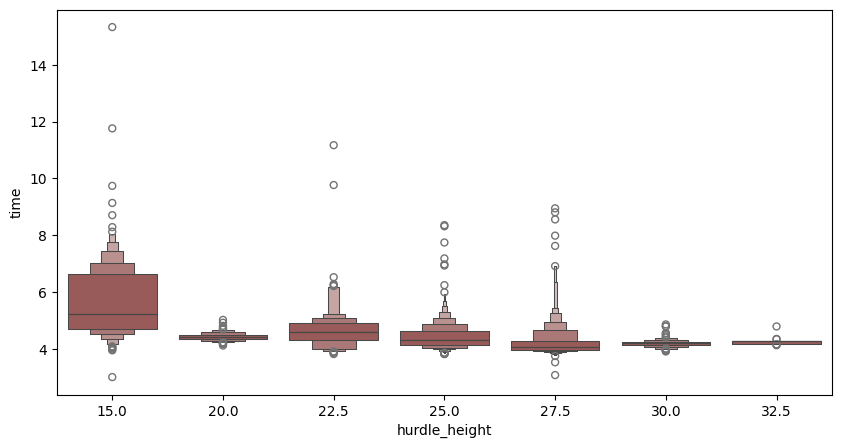

In [144]:
# Effect of jump heights on running time, checked again as this was one of the most important variables according to SHAP
plt.figure(figsize=(10,5))
sns.boxenplot(x=dog_perf_num['hurdle_height'],y=dog_perf_num['time'])

## Change times

In [145]:
# Fit a model
X = dog_perf_num_encoded[dog_perf_num_encoded['chng'].isna() == 0][['track', 'temperature', 'humidity', 'precipitation',
       'wind_speed', 'wind_gusts', 'hurdle_height', 'age',
       'name_Agnes',
       'name_Alex', 'name_Alfie', 'name_Angie', 'name_Apollo', 'name_Ashley',
       'name_Bailey', 'name_Bella', 'name_Bonnie', 'name_Bree', 'name_Brix',
       'name_Brooke', 'name_Bruno', 'name_Cookies', 'name_Dexter',
       'name_Dixie', 'name_Dusty', 'name_Easy', 'name_Enola', 'name_Falco',
       'name_Fleur', 'name_Gerry', 'name_Gordon', 'name_Hank', 'name_Hector',
       'name_Henry', 'name_Jasper', 'name_Jessie', 'name_Kent', 'name_Kesha',
       'name_Maggie', 'name_Mason', 'name_Milo', 'name_Moon', 'name_Negro',
       'name_Nina', 'name_Pax', 'name_Punk', 'name_Rex', 'name_Riley',
       'name_Rocky', 'name_Sara', 'name_Scotty', 'name_Sirius', 'name_Speedy',
       'name_Sunny', 'name_Ted', 'name_Them', 'name_Tyna',
       'breed_australian kelpie', 'breed_australian shepperd',
       'breed_belgian shepherd - malinois', 'breed_border',
       'breed_jack russell terrier', 'breed_mix', 'breed_kooikerhondje',
       'breed_mudi', 'breed_parson russell terrier',
       'breed_patterdale terrier', 'breed_sheltie', 'breed_small schnauzer',
       'breed_whippet',
       'championship_efc', 'sex_male', 'castrated_sexual']].copy()

y = dog_perf_num_encoded['chng'].dropna().copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Use 10 random trees
model = RandomForestRegressor(max_depth=5, random_state=101)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=101)

In [146]:
MAE = mean_absolute_error(y_test,model.predict(X_test))
MSE = mean_squared_error(y_test,model.predict(X_test))
RMSE = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

MSE/(dog_perf_num['chng'].mean())   # Model accuracy is not good enough, so I won't look further, the result would not be relevant

3.372214455905074